# Data Preprocessing

In [4]:
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
df=pd.read_csv(r'/Users/mrkashif/Documents/Zahra_docs/MINS/MINS_Project/postoperative_final_tbu_dataset.csv')
df_copy = df.copy()

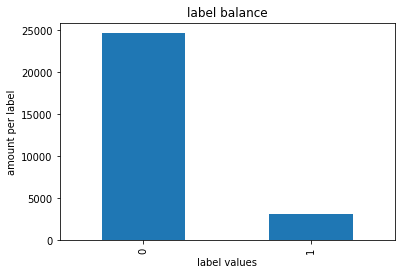

0    24651
1     3099
Name: MINS_final, dtype: int64


In [7]:
df['MINS_final'].value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()
print(df['MINS_final'].value_counts())

In [8]:
# If any yes/columns are present then change it to numeric type.
def convert_yn_to_01(row, column_name):
    return 1 if row[column_name] == 'Female' else 0

df_new1 = df_copy.copy()

In [9]:
bool_columns = ['gender_desc_at_surg_checkin']
for bool_col in bool_columns:
    df_new1[bool_col + '_updated'] = df.apply(lambda row: convert_yn_to_01(row, bool_col),axis=1)

In [10]:
df_new1 = df_new1.drop(columns = bool_columns)
df_new1 = df_new1.rename(columns={'gender_desc_at_surg_checkin_updated': 'gender_updated'})

In [11]:
df_new1

,encntr_id,encntr_num,mrn,age_at_surg_checkin,is_surg_case_major,surgery_performed_date,admit_dt_tm,disch_dt_tm,patient_in_room_dt_tm,patient_out_room_dt_tm,...,longest_single_episode_dbp_80_flag,longest_single_episode_dbp_90_flag,longest_single_episode_dbp_100_flag,longest_single_episode_pulse_60_flag,longest_single_episode_pulse_100_flag,longest_single_episode_spo2_88_flag,longest_single_episode_spo2_90_flag,standardized_collection_dt_tm,MINS_final,gender_updated
0,102046401,2000000543658,200044009,70,1,16-11-2020,16-11-2020 06:02,18-11-2020 09:45,16-11-2020 07:51,16-11-2020 10:35,...,0,0,0,0,1,0,0,NaN,0,0
1,102046401,2000000543658,200044009,70,1,16-11-2020,16-11-2020 06:02,18-11-2020 09:45,16-11-2020 07:51,16-11-2020 10:35,...,0,0,0,0,1,0,0,NaN,0,0
2,102046401,2000000543658,200044009,70,1,16-11-2020,16-11-2020 06:02,18-11-2020 09:45,16-11-2020 07:51,16-11-2020 10:35,...,0,0,0,0,1,0,0,NaN,0,0
3,102046401,2000000543658,200044009,70,1,16-11-2020,16-11-2020 06:02,18-11-2020 09:45,16-11-2020 07:51,16-11-2020 10:35,...,0,0,0,0,1,0,0,NaN,0,0
4,102046401,2000000543658,200044009,70,1,16-11-2020,16-11-2020 06:02,18-11-2020 09:45,16-11-2020 07:51,16-11-2020 10:35,...,0,0,0,0,1,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,111955725,2000002343925,111088141,73,1,29-06-2021,28-06-2021 16:50,06-07-2021 16:01,29-06-2021 19:51,29-06-2021 23:33,...,0,0,0,0,0,0,0,2020-01-02 11:01,1,0
27746,111955725,2000002343925,111088141,73,1,29-06-2021,28-06-2021 16:50,06-07-2021 16:01,29-06-2021 19:51,29-06-2021 23:33,...,0,0,0,0,0,0,0,2020-01-02 11:01,1,0
27747,111955725,2000002343925,111088141,73,1,29-06-2021,28-06-2021 16:50,06-07-2021 16:01,29-06-2021 19:51,29-06-2021 23:33,...,0,0,0,0,0,1,1,2020-01-02 11:01,1,0
27748,111955725,2000002343925,111088141,73,1,29-06-2021,28-06-2021 16:50,06-07-2021 16:01,29-06-2021 19:51,29-06-2021 23:33,...,0,0,0,0,0,0,0,2020-01-02 11:01,1,0


In [12]:
df_new1['standardized_collection_dt_tm']= pd.to_datetime(df_new1['standardized_collection_dt_tm'])
df_new1['disch_time_surg_end']= pd.to_datetime(df_new1['disch_time_surg_end'])
df_new1['standardized_clinical_time_lead']= pd.to_datetime(df_new1['standardized_clinical_time_lead'])
df_new1['standardized_clinical_event_time']= pd.to_datetime(df_new1['standardized_clinical_event_time'])
df_new1['clinical_event_performed_dt_tm']= pd.to_datetime(df_new1['clinical_event_performed_dt_tm'])
df_new1['standardized_surg_stop_time']= pd.to_datetime(df_new1['standardized_surg_stop_time'])
df_new1['surg_stop_dt_tm']= pd.to_datetime(df_new1['surg_stop_dt_tm'])
df_new1['surg_start_dt_tm']= pd.to_datetime(df_new1['surg_start_dt_tm'])
df_new1['patient_out_room_dt_tm']= pd.to_datetime(df_new1['patient_out_room_dt_tm'])
df_new1['patient_in_room_dt_tm']= pd.to_datetime(df_new1['patient_in_room_dt_tm'])
df_new1['disch_dt_tm']= pd.to_datetime(df_new1['disch_dt_tm'])
df_new1['admit_dt_tm']= pd.to_datetime(df_new1['admit_dt_tm'])
df_new1['surgery_performed_date']= pd.to_datetime(df_new1['surgery_performed_date'])

In [13]:
from sklearn.preprocessing import LabelEncoder

category_data = df_new1.select_dtypes(include='object').columns
numerical_data= df_new1.select_dtypes(exclude='object').columns

df_new2 = df_new1[category_data].apply(LabelEncoder().fit_transform)
df_new2

,anesthesia_type_desc,sched_surg_priority_desc,disch_disp_desc_src,artifact_code_invasive_5,artifact_code_invasive_2,artifact_code_invasive_3,artifact_code_invasive_4,artifact_code_invasive_6,artifact_code_invasive_8,artifact_code_non_invasive_5,...,lead_st_time,Ibullet1,Ibullet2,Ibullet3,Ibullet4,Ibullet5,NI_bullet1,NI_bullet2,NI_bullet3,NI_bullet4
0,10,5,2,0,1,1,1,1,1,0,...,103,0,1,1,1,0,0,0,0,0
1,10,5,2,0,1,1,1,1,1,0,...,105,0,1,1,1,0,0,0,0,0
2,10,5,2,0,1,1,1,1,1,0,...,170,0,1,1,1,0,0,0,0,0
3,10,5,2,0,1,1,1,1,1,0,...,188,0,1,1,1,0,0,0,0,0
4,10,5,2,0,1,1,1,1,1,0,...,195,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,1,3,3,0,1,1,1,1,1,0,...,3786,0,1,1,1,0,0,0,0,0
27746,1,3,3,0,1,1,1,1,1,0,...,3857,0,1,1,1,0,0,0,0,0
27747,1,3,3,0,1,1,1,1,1,0,...,3862,0,1,1,1,0,0,0,0,0
27748,1,3,3,0,1,1,1,1,1,0,...,3863,0,1,1,1,0,0,0,0,0


In [14]:
final_data_set = pd.DataFrame()
for col in category_data:
    if col != 'lag_st_time' and col != 'lead_st_time':
        print(col, len(df_new2[col].unique()))
        col_vals = [vals for vals in df_new2[col].unique()]
        onehot_cols = [col + '_' + str(s) for s in col_vals]
        dummies_train = pd.get_dummies(df_new2[col], prefix=col)
        train_data = pd.get_dummies(df_new2[col], prefix=col)
        final_data_set = pd.concat([final_data_set , dummies_train], axis=1)

anesthesia_type_desc 11
sched_surg_priority_desc 6
disch_disp_desc_src 12
artifact_code_invasive_5 1
artifact_code_invasive_2 2
artifact_code_invasive_3 2
artifact_code_invasive_4 2
artifact_code_invasive_6 2
artifact_code_invasive_8 2
artifact_code_non_invasive_5 1
artifact_code_non_invasive_2 2
artifact_code_non_invasive_3 2
artifact_code_non_invasive_4 2
artifact_code_non_invasive_6 1
artifact_code_non_invasive_8 1
artifact_code_non_invasive_10 1
Ibullet1 1
Ibullet2 2
Ibullet3 2
Ibullet4 2
Ibullet5 1
NI_bullet1 1
NI_bullet2 2
NI_bullet3 2
NI_bullet4 2


In [15]:
final_data = pd.concat([final_data_set,df_new1[numerical_data]], axis = 1)
final_data

,anesthesia_type_desc_0,anesthesia_type_desc_1,anesthesia_type_desc_2,anesthesia_type_desc_3,anesthesia_type_desc_4,anesthesia_type_desc_5,anesthesia_type_desc_6,anesthesia_type_desc_7,anesthesia_type_desc_8,anesthesia_type_desc_9,...,longest_single_episode_dbp_80_flag,longest_single_episode_dbp_90_flag,longest_single_episode_dbp_100_flag,longest_single_episode_pulse_60_flag,longest_single_episode_pulse_100_flag,longest_single_episode_spo2_88_flag,longest_single_episode_spo2_90_flag,standardized_collection_dt_tm,MINS_final,gender_updated
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaT,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaT,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaT,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaT,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020-01-02 11:01:00,1,0
27746,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020-01-02 11:01:00,1,0
27747,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2020-01-02 11:01:00,1,0
27748,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020-01-02 11:01:00,1,0


In [16]:
import datetime as dt
final_data['standardized_collection_dt_tm'] = pd.to_datetime(final_data['standardized_collection_dt_tm'])
final_data['standardized_collection_dt_tm']=final_data['standardized_collection_dt_tm'].map(dt.datetime.toordinal)

final_data['disch_time_surg_end'] = pd.to_datetime(final_data['disch_time_surg_end'])
final_data['disch_time_surg_end']=final_data['disch_time_surg_end'].map(dt.datetime.toordinal)

final_data['standardized_clinical_time_lead'] = pd.to_datetime(final_data['standardized_clinical_time_lead'])
final_data['standardized_clinical_time_lead']=final_data['standardized_clinical_time_lead'].map(dt.datetime.toordinal)

final_data['standardized_clinical_event_time'] = pd.to_datetime(final_data['standardized_clinical_event_time'])
final_data['standardized_clinical_event_time']=final_data['standardized_clinical_event_time'].map(dt.datetime.toordinal)

final_data['clinical_event_performed_dt_tm'] = pd.to_datetime(final_data['clinical_event_performed_dt_tm'])
final_data['clinical_event_performed_dt_tm']=final_data['clinical_event_performed_dt_tm'].map(dt.datetime.toordinal)

final_data['standardized_surg_stop_time'] = pd.to_datetime(final_data['standardized_surg_stop_time'])
final_data['standardized_surg_stop_time']=final_data['standardized_surg_stop_time'].map(dt.datetime.toordinal)

final_data['surg_stop_dt_tm'] = pd.to_datetime(final_data['surg_stop_dt_tm'])
final_data['surg_stop_dt_tm']=final_data['surg_stop_dt_tm'].map(dt.datetime.toordinal)

final_data['surg_start_dt_tm'] = pd.to_datetime(final_data['surg_start_dt_tm'])
final_data['surg_start_dt_tm']=final_data['surg_start_dt_tm'].map(dt.datetime.toordinal)

final_data['patient_out_room_dt_tm'] = pd.to_datetime(final_data['patient_out_room_dt_tm'])
final_data['patient_out_room_dt_tm']=final_data['patient_out_room_dt_tm'].map(dt.datetime.toordinal)

final_data['patient_in_room_dt_tm'] = pd.to_datetime(final_data['patient_in_room_dt_tm'])
final_data['patient_in_room_dt_tm']=final_data['patient_in_room_dt_tm'].map(dt.datetime.toordinal)

final_data['disch_dt_tm'] = pd.to_datetime(final_data['disch_dt_tm'])
final_data['disch_dt_tm']=final_data['disch_dt_tm'].map(dt.datetime.toordinal)

final_data['admit_dt_tm'] = pd.to_datetime(final_data['admit_dt_tm'])
final_data['admit_dt_tm']=final_data['admit_dt_tm'].map(dt.datetime.toordinal)

final_data['surgery_performed_date'] = pd.to_datetime(final_data['surgery_performed_date'])
final_data['surgery_performed_date']=final_data['surgery_performed_date'].map(dt.datetime.toordinal)

final_data['MAP_Non_Invasive_calc'] = pd.to_datetime(final_data['MAP_Non_Invasive_calc'])
final_data['MAP_Non_Invasive_calc']=final_data['MAP_Non_Invasive_calc'].map(dt.datetime.toordinal)



In [17]:
final_data

,anesthesia_type_desc_0,anesthesia_type_desc_1,anesthesia_type_desc_2,anesthesia_type_desc_3,anesthesia_type_desc_4,anesthesia_type_desc_5,anesthesia_type_desc_6,anesthesia_type_desc_7,anesthesia_type_desc_8,anesthesia_type_desc_9,...,longest_single_episode_dbp_80_flag,longest_single_episode_dbp_90_flag,longest_single_episode_dbp_100_flag,longest_single_episode_pulse_60_flag,longest_single_episode_pulse_100_flag,longest_single_episode_spo2_88_flag,longest_single_episode_spo2_90_flag,standardized_collection_dt_tm,MINS_final,gender_updated
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,737426,1,0
27746,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,737426,1,0
27747,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,737426,1,0
27748,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,737426,1,0


In [18]:
#feature selection for vitals
data_to_use = final_data[['age_at_surg_checkin',
                          'peripheral_pulse_rate', 
                          'Respiratory_Rate_br_per_min',
                          'SpO2', 
                          'map_rec_final',
                          'sbp_final', 
                          'dbp_final', 
                          'map_cal_final', 
                          'sbp_final_min', 
                          'dbp_final_min', 
                          'map_final_min',
                          'pulse_rate_max', 
                          'gender_updated',
                          'anesthesia_type_desc_0',
                           'anesthesia_type_desc_1',
                            'anesthesia_type_desc_2',
                            'anesthesia_type_desc_3',
                            'anesthesia_type_desc_4',
                            'anesthesia_type_desc_5',
                            'anesthesia_type_desc_6',
                            'anesthesia_type_desc_7',
                            'anesthesia_type_desc_8',
                            'anesthesia_type_desc_9',
                            'anesthesia_type_desc_10',
                            'sched_surg_priority_desc_0',
                            'sched_surg_priority_desc_1',
                            'sched_surg_priority_desc_2',
                            'sched_surg_priority_desc_3',
                            'sched_surg_priority_desc_4',
                            'sched_surg_priority_desc_5',
                            'disch_disp_desc_src_0',
                            'disch_disp_desc_src_1',
                            'disch_disp_desc_src_2',
                            'disch_disp_desc_src_3',
                            'disch_disp_desc_src_4',
                            'disch_disp_desc_src_5',
                            'disch_disp_desc_src_6',
                            'disch_disp_desc_src_7',
                            'disch_disp_desc_src_8',
                            'disch_disp_desc_src_9',
                            'disch_disp_desc_src_10',
                            'disch_disp_desc_src_11',
                            'is_surg_case_major',
                            'surg_start_to_stop_elapsed_time_minutes',
                            'diff_in_seconds',
                            'max_pulse_variation'
                          
                          
                         ]]
data_to_use

,age_at_surg_checkin,peripheral_pulse_rate,Respiratory_Rate_br_per_min,SpO2,map_rec_final,sbp_final,dbp_final,map_cal_final,sbp_final_min,dbp_final_min,...,disch_disp_desc_src_6,disch_disp_desc_src_7,disch_disp_desc_src_8,disch_disp_desc_src_9,disch_disp_desc_src_10,disch_disp_desc_src_11,is_surg_case_major,surg_start_to_stop_elapsed_time_minutes,diff_in_seconds,max_pulse_variation
0,70,92,25.0,91,80,133,60,84,117,53,...,0,0,0,0,0,0,1,114,27678960,92
1,70,78,16.0,93,76,129,53,78,117,53,...,0,0,0,0,0,0,1,114,27678960,92
2,70,78,23.0,0,89,143,77,99,117,53,...,0,0,0,0,0,0,1,114,27678960,92
3,70,86,18.0,93,97,146,78,101,117,53,...,0,0,0,0,0,0,1,114,27678960,92
4,70,71,28.0,92,93,144,73,97,117,53,...,0,0,0,0,0,0,1,114,27678960,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,73,94,0.0,0,127,181,100,127,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27746,73,86,0.0,0,121,172,96,121,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27747,73,0,0.0,0,118,170,92,118,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27748,73,87,0.0,96,130,179,105,130,86,55,...,0,0,0,0,0,0,1,142,47163360,106


In [19]:
# remove rows with null/nan values
data_to_use = data_to_use.dropna()
data_to_use

,age_at_surg_checkin,peripheral_pulse_rate,Respiratory_Rate_br_per_min,SpO2,map_rec_final,sbp_final,dbp_final,map_cal_final,sbp_final_min,dbp_final_min,...,disch_disp_desc_src_6,disch_disp_desc_src_7,disch_disp_desc_src_8,disch_disp_desc_src_9,disch_disp_desc_src_10,disch_disp_desc_src_11,is_surg_case_major,surg_start_to_stop_elapsed_time_minutes,diff_in_seconds,max_pulse_variation
0,70,92,25.0,91,80,133,60,84,117,53,...,0,0,0,0,0,0,1,114,27678960,92
1,70,78,16.0,93,76,129,53,78,117,53,...,0,0,0,0,0,0,1,114,27678960,92
2,70,78,23.0,0,89,143,77,99,117,53,...,0,0,0,0,0,0,1,114,27678960,92
3,70,86,18.0,93,97,146,78,101,117,53,...,0,0,0,0,0,0,1,114,27678960,92
4,70,71,28.0,92,93,144,73,97,117,53,...,0,0,0,0,0,0,1,114,27678960,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,73,94,0.0,0,127,181,100,127,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27746,73,86,0.0,0,121,172,96,121,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27747,73,0,0.0,0,118,170,92,118,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27748,73,87,0.0,96,130,179,105,130,86,55,...,0,0,0,0,0,0,1,142,47163360,106


In [20]:
data_to_use.columns

Index(['age_at_surg_checkin', 'peripheral_pulse_rate',
       'Respiratory_Rate_br_per_min', 'SpO2', 'map_rec_final', 'sbp_final',
       'dbp_final', 'map_cal_final', 'sbp_final_min', 'dbp_final_min',
       'map_final_min', 'pulse_rate_max', 'gender_updated',
       'anesthesia_type_desc_0', 'anesthesia_type_desc_1',
       'anesthesia_type_desc_2', 'anesthesia_type_desc_3',
       'anesthesia_type_desc_4', 'anesthesia_type_desc_5',
       'anesthesia_type_desc_6', 'anesthesia_type_desc_7',
       'anesthesia_type_desc_8', 'anesthesia_type_desc_9',
       'anesthesia_type_desc_10', 'sched_surg_priority_desc_0',
       'sched_surg_priority_desc_1', 'sched_surg_priority_desc_2',
       'sched_surg_priority_desc_3', 'sched_surg_priority_desc_4',
       'sched_surg_priority_desc_5', 'disch_disp_desc_src_0',
       'disch_disp_desc_src_1', 'disch_disp_desc_src_2',
       'disch_disp_desc_src_3', 'disch_disp_desc_src_4',
       'disch_disp_desc_src_5', 'disch_disp_desc_src_6',
       'disc

In [423]:
linear_model = LinearRegression()

In [424]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=20, random_state=0)

In [565]:
#!/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install xgboost
#!/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install xgboost==0.90
# !/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.ngc.nvidia.com
# !/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install cuml-cu11 --extra-index-url=https://pypi.ngc.nvidia.com
# !/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install cugraph-cu11 --extra-index-url=https://pypi.ngc.nvidia.com
# !/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install cupy-cuda11x -f https://pip.cupy.dev/aarch64


Looking in links: https://pip.cupy.dev/aarch64
ERROR: Could not find a version that satisfies the requirement cupy-cuda11x (from versions: none)
ERROR: No matching distribution found for cupy-cuda11x
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


# XGBOOST

In [23]:
# the most commonly configured hyperparameters are the following:

# n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
# max_depth: The maximum depth of each tree, often values are between 1 and 10.

# eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.

# subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to 
# use all samples.

# colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 
# to use all features.



In [595]:
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [596]:
#Bagging

In [597]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(n_estimators=100, random_state=12)

# Introduce missing values in the dataset

In [598]:
def dbp_missing(final_data, x,y, frac):
    
    #store datasets with missing values(dbp)
    y_data = final_data.iloc[:, 6].values
    X_data = final_data.iloc[:, np.r_[0:6,7:46]].values
    
    df_copy = final_data.copy()
    df_copy[x] = df_copy[x].sample(frac=frac, random_state=12)
    df_copy[x].isna().sum()
    df_copy.rename(columns={x: y}, inplace=True)
    df_copy[y]
    df_dbp = pd.concat([final_data, df_copy[y]], axis=1)
    actual = df_dbp[x]
    pred = df_dbp[y]
    return df_dbp
    

In [599]:
# generating datasets with 5,10,20,30,40,50% of missing values for dbp , originally idx 6
dbp_5 = dbp_missing(data_to_use, 'dbp_final', 'dbp_ampute', 0.95)
dbp_10 = dbp_missing(data_to_use, 'dbp_final', 'dbp_ampute', 0.90)
dbp_20 = dbp_missing(data_to_use, 'dbp_final', 'dbp_ampute', 0.80)
dbp_30 = dbp_missing(data_to_use, 'dbp_final', 'dbp_ampute', 0.70)
dbp_40 = dbp_missing(data_to_use, 'dbp_final', 'dbp_ampute', 0.60)
dbp_50 = dbp_missing(data_to_use, 'dbp_final', 'dbp_ampute', 0.50)

In [600]:
dbp_50

,age_at_surg_checkin,peripheral_pulse_rate,Respiratory_Rate_br_per_min,SpO2,map_rec_final,sbp_final,dbp_final,map_cal_final,sbp_final_min,dbp_final_min,...,disch_disp_desc_src_7,disch_disp_desc_src_8,disch_disp_desc_src_9,disch_disp_desc_src_10,disch_disp_desc_src_11,is_surg_case_major,surg_start_to_stop_elapsed_time_minutes,diff_in_seconds,max_pulse_variation,dbp_ampute
0,70,92,25.0,91,80,133,60,84,117,53,...,0,0,0,0,0,1,114,27678960,92,60.0
1,70,78,16.0,93,76,129,53,78,117,53,...,0,0,0,0,0,1,114,27678960,92,NaN
2,70,78,23.0,0,89,143,77,99,117,53,...,0,0,0,0,0,1,114,27678960,92,77.0
3,70,86,18.0,93,97,146,78,101,117,53,...,0,0,0,0,0,1,114,27678960,92,NaN
4,70,71,28.0,92,93,144,73,97,117,53,...,0,0,0,0,0,1,114,27678960,92,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,73,94,0.0,0,127,181,100,127,86,55,...,0,0,0,0,0,1,142,47163360,106,100.0
27746,73,86,0.0,0,121,172,96,121,86,55,...,0,0,0,0,0,1,142,47163360,106,NaN
27747,73,0,0.0,0,118,170,92,118,86,55,...,0,0,0,0,0,1,142,47163360,106,NaN
27748,73,87,0.0,96,130,179,105,130,86,55,...,0,0,0,0,0,1,142,47163360,106,105.0


In [601]:
dbp_x = dbp_missing(data_to_use, 'dbp_final', 'dbp_ampute', 0.50)
dbp_x

,age_at_surg_checkin,peripheral_pulse_rate,Respiratory_Rate_br_per_min,SpO2,map_rec_final,sbp_final,dbp_final,map_cal_final,sbp_final_min,dbp_final_min,...,disch_disp_desc_src_7,disch_disp_desc_src_8,disch_disp_desc_src_9,disch_disp_desc_src_10,disch_disp_desc_src_11,is_surg_case_major,surg_start_to_stop_elapsed_time_minutes,diff_in_seconds,max_pulse_variation,dbp_ampute
0,70,92,25.0,91,80,133,60,84,117,53,...,0,0,0,0,0,1,114,27678960,92,60.0
1,70,78,16.0,93,76,129,53,78,117,53,...,0,0,0,0,0,1,114,27678960,92,NaN
2,70,78,23.0,0,89,143,77,99,117,53,...,0,0,0,0,0,1,114,27678960,92,77.0
3,70,86,18.0,93,97,146,78,101,117,53,...,0,0,0,0,0,1,114,27678960,92,NaN
4,70,71,28.0,92,93,144,73,97,117,53,...,0,0,0,0,0,1,114,27678960,92,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,73,94,0.0,0,127,181,100,127,86,55,...,0,0,0,0,0,1,142,47163360,106,100.0
27746,73,86,0.0,0,121,172,96,121,86,55,...,0,0,0,0,0,1,142,47163360,106,NaN
27747,73,0,0.0,0,118,170,92,118,86,55,...,0,0,0,0,0,1,142,47163360,106,NaN
27748,73,87,0.0,96,130,179,105,130,86,55,...,0,0,0,0,0,1,142,47163360,106,105.0


In [602]:
def sbp_missing(final_data, x,y, frac):
    
    #store datasets with missing values(dbp)
    y_data = final_data.iloc[:, 5].values
    X_data = final_data.iloc[:, np.r_[0:5,6:46]].values
    
    df_copy = final_data.copy()
    df_copy[x] = df_copy[x].sample(frac=frac, random_state=12)
    df_copy[x].isna().sum()
    df_copy.rename(columns={x: y}, inplace=True)
    df_copy[y]
    df_sbp = pd.concat([final_data, df_copy[y]], axis=1)
    actual = df_sbp[x]
    pred = df_sbp[y]
    return df_sbp
    

In [603]:
# generating datasets with 5,10,20,30,40,50% of missing values for sbp , originally idx 5
sbp_5 = sbp_missing(data_to_use, 'sbp_final', 'sbp_ampute', 0.95)
sbp_10 = sbp_missing(data_to_use, 'sbp_final', 'sbp_ampute', 0.90)
sbp_20 = sbp_missing(data_to_use, 'sbp_final', 'sbp_ampute', 0.80)
sbp_30 = sbp_missing(data_to_use, 'sbp_final', 'sbp_ampute', 0.70)
sbp_40 = sbp_missing(data_to_use, 'sbp_final', 'sbp_ampute', 0.60)
sbp_50 = sbp_missing(data_to_use, 'sbp_final', 'sbp_ampute', 0.50)

In [604]:
def pulse_missing(final_data, x,y, frac):
    
    #store datasets with missing values(dbp)
    y_data = final_data.iloc[:, 1].values
    X_data = final_data.iloc[:, np.r_[0:1,2:46]].values
    
    df_copy = final_data.copy()
    df_copy[x] = df_copy[x].sample(frac=frac, random_state=12)
    df_copy[x].isna().sum()
    df_copy.rename(columns={x: y}, inplace=True)
    df_copy[y]
    df_sbp = pd.concat([final_data, df_copy[y]], axis=1)
    actual = df_sbp[x]
    pred = df_sbp[y]
    return df_sbp
    

In [605]:
# generating datasets with 5,10,20,30,40,50% of missing values for pulse , originally idx 5
pulse_5 = pulse_missing(data_to_use, 'peripheral_pulse_rate', 'pulse_ampute', 0.95)
pulse_10 = pulse_missing(data_to_use, 'peripheral_pulse_rate', 'pulse_ampute', 0.90)
pulse_20 = pulse_missing(data_to_use, 'peripheral_pulse_rate', 'pulse_ampute', 0.80)
pulse_30 = pulse_missing(data_to_use, 'peripheral_pulse_rate', 'pulse_ampute', 0.70)
pulse_40 = pulse_missing(data_to_use, 'peripheral_pulse_rate', 'pulse_ampute', 0.60)
pulse_50 = pulse_missing(data_to_use, 'peripheral_pulse_rate', 'pulse_ampute', 0.50)

In [606]:
def resp_missing(final_data, x,y, frac):
    
    #store datasets with missing values(dbp)
    y_data = final_data.iloc[:, 2].values
    X_data = final_data.iloc[:, np.r_[0:2,3:46]].values
    
    df_copy = final_data.copy()
    df_copy[x] = df_copy[x].sample(frac=frac, random_state=12)
    df_copy[x].isna().sum()
    df_copy.rename(columns={x: y}, inplace=True)
    df_copy[y]
    df_sbp = pd.concat([final_data, df_copy[y]], axis=1)
    actual = df_sbp[x]
    pred = df_sbp[y]
    return df_sbp
    

In [607]:
# generating datasets with 5,10,20,30,40,50% of missing values for resp , originally idx 5
resp_5 = resp_missing(data_to_use, 'Respiratory_Rate_br_per_min', 'resp_ampute', 0.95)
resp_10 = resp_missing(data_to_use, 'Respiratory_Rate_br_per_min', 'resp_ampute', 0.90)
resp_20 = resp_missing(data_to_use, 'Respiratory_Rate_br_per_min', 'resp_ampute', 0.80)
resp_30 = resp_missing(data_to_use, 'Respiratory_Rate_br_per_min', 'resp_ampute', 0.70)
resp_40 = resp_missing(data_to_use, 'Respiratory_Rate_br_per_min', 'resp_ampute', 0.60)
resp_50 = resp_missing(data_to_use, 'Respiratory_Rate_br_per_min', 'resp_ampute', 0.50)

In [608]:
data_to_use

,age_at_surg_checkin,peripheral_pulse_rate,Respiratory_Rate_br_per_min,SpO2,map_rec_final,sbp_final,dbp_final,map_cal_final,sbp_final_min,dbp_final_min,...,disch_disp_desc_src_6,disch_disp_desc_src_7,disch_disp_desc_src_8,disch_disp_desc_src_9,disch_disp_desc_src_10,disch_disp_desc_src_11,is_surg_case_major,surg_start_to_stop_elapsed_time_minutes,diff_in_seconds,max_pulse_variation
0,70,92,25.0,91,80,133,60,84,117,53,...,0,0,0,0,0,0,1,114,27678960,92
1,70,78,16.0,93,76,129,53,78,117,53,...,0,0,0,0,0,0,1,114,27678960,92
2,70,78,23.0,0,89,143,77,99,117,53,...,0,0,0,0,0,0,1,114,27678960,92
3,70,86,18.0,93,97,146,78,101,117,53,...,0,0,0,0,0,0,1,114,27678960,92
4,70,71,28.0,92,93,144,73,97,117,53,...,0,0,0,0,0,0,1,114,27678960,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,73,94,0.0,0,127,181,100,127,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27746,73,86,0.0,0,121,172,96,121,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27747,73,0,0.0,0,118,170,92,118,86,55,...,0,0,0,0,0,0,1,142,47163360,106
27748,73,87,0.0,96,130,179,105,130,86,55,...,0,0,0,0,0,0,1,142,47163360,106


In [609]:
folds_5 = {
    'fold_1': {},
    'fold_2': {},
    'fold_3': {},
    'fold_4': {},
    'fold_5': {} 
}

folds_10 = {
    'fold_1': {},
    'fold_2': {},
    'fold_3': {},
    'fold_4': {},
    'fold_5': {},
    'fold_6': {},
    'fold_7': {},
    'fold_8': {},
    'fold_9': {},
    'fold_10': {}
}

# Divide into k-folds

In [610]:
# shuffle shuffle=True the data and divide into k folds (5) n_splits=5
# the k folds should have the same partitions, so we set random_state=0
from sklearn.model_selection import KFold
def k_folds_cross(final_data, k, folds):
    y_data = final_data.iloc[:, 46].values
    X_data = final_data.iloc[:, np.r_[0:46]].values
    k_folds = KFold(n_splits = k, shuffle=True, random_state=0)
    
    i = 1
    for train_index, test_index in k_folds.split(X_data, y_data):
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        fold_num = 'fold_'+str(i)
        folds[fold_num] = {
           'X_train': X_train,
           'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test   
        }   

        i = i+1
    return folds

In [611]:
from sklearn.utils import resample
data = [1,2,3,4,5,6,7,8,9,10]
n_iterations = 10       
n_size = int(len(data) * 1)
stats = list()
for i in range(n_iterations):
    train = resample(data, n_samples=n_size)#, random_state=0)   
    test = np.array([x for x in data if x not in train]) 
    print("Train_data ->", train, " " , "Test_data ->", test)


Train_data -> [8, 2, 5, 2, 5, 7, 7, 10, 10, 9]   Test_data -> [1 3 4 6]
Train_data -> [3, 8, 5, 6, 7, 7, 8, 6, 4, 10]   Test_data -> [1 2 9]
Train_data -> [8, 9, 1, 3, 8, 8, 1, 3, 8, 9]   Test_data -> [ 2  4  5  6  7 10]
Train_data -> [8, 4, 2, 10, 4, 5, 6, 8, 4, 6]   Test_data -> [1 3 7 9]
Train_data -> [7, 8, 6, 5, 10, 5, 9, 5, 3, 10]   Test_data -> [1 2 4]
Train_data -> [4, 4, 1, 2, 3, 7, 7, 1, 8, 5]   Test_data -> [ 6  9 10]
Train_data -> [2, 8, 10, 6, 6, 5, 7, 9, 5, 8]   Test_data -> [1 3 4]
Train_data -> [1, 2, 2, 1, 5, 10, 2, 9, 3, 5]   Test_data -> [4 6 7 8]
Train_data -> [5, 9, 3, 5, 6, 1, 9, 1, 4, 7]   Test_data -> [ 2  8 10]
Train_data -> [8, 9, 9, 6, 2, 6, 9, 3, 10, 5]   Test_data -> [1 4 7]


In [612]:
from sklearn.utils import resample
df = pd.DataFrame({'num_legs': [1,2,3,4,5,6,7,8,9],
                   'num_wings':[1,2,3,4,5,6,7,8,9],
                   'num_specimen_seen': [1,2,3,4,5,6,7,8,9]},
                  )

X = df['num_legs']
y = df['num_specimen_seen']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
print(X_train.values)
print(y_train.values)
new_x, new_y = resample(X_train, y_train, n_samples=9)
print(new_x.values)
print(new_y.values)

[5 7 4 2 1 3]
[5 7 4 2 1 3]
[2 7 1 3 2 5 2 7 7]
[2 7 1 3 2 5 2 7 7]


In [613]:
columns = ['age_at_surg_checkin',
                          'peripheral_pulse_rate', 
                          'Respiratory_Rate_br_per_min',
                          'SpO2', 
                          'map_rec_final',
                          'sbp_final', 
                          'dbp_final', 
                          'map_cal_final', 
                          'sbp_final_min', 
                          'dbp_final_min', 
                          'map_final_min',
                          'pulse_rate_max', 
                          'gender_updated',
                          'anesthesia_type_desc_0',
                           'anesthesia_type_desc_1',
                            'anesthesia_type_desc_2',
                            'anesthesia_type_desc_3',
                            'anesthesia_type_desc_4',
                            'anesthesia_type_desc_5',
                            'anesthesia_type_desc_6',
                            'anesthesia_type_desc_7',
                            'anesthesia_type_desc_8',
                            'anesthesia_type_desc_9',
                            'anesthesia_type_desc_10',
                            'sched_surg_priority_desc_0',
                            'sched_surg_priority_desc_1',
                            'sched_surg_priority_desc_2',
                            'sched_surg_priority_desc_3',
                            'sched_surg_priority_desc_4',
                            'sched_surg_priority_desc_5',
                            'disch_disp_desc_src_0',
                            'disch_disp_desc_src_1',
                            'disch_disp_desc_src_2',
                            'disch_disp_desc_src_3',
                            'disch_disp_desc_src_4',
                            'disch_disp_desc_src_5',
                            'disch_disp_desc_src_6',
                            'disch_disp_desc_src_7',
                            'disch_disp_desc_src_8',
                            'disch_disp_desc_src_9',
                            'disch_disp_desc_src_10',
                            'disch_disp_desc_src_11',
                            'is_surg_case_major',
                            'surg_start_to_stop_elapsed_time_minutes',
                            'diff_in_seconds',
                            'max_pulse_variation'
                          
                          
                         ]

In [614]:
# Bootstrap validation 

In [615]:

from sklearn.utils import resample

def bootstrap_val_old(final_data, amputed_col):
    # getting the size of the data and also storing index numbers so that we can use -->
    # list index to do resampling and reflect it on the actual data. This is less -->
    # complex than doing it directly on the data.
    data = final_data.copy()
    values = data.values
    data_index = list(range(0,27747))

    n_iterations = 10      
    n_samples = int(len(data_index) * 1)
    stats = list()

    # we want to do bootstrap validation for 100 iterations, so we will structure this as if it is 100 folds
    iters = {}

    for i in range(n_iterations):
        # dictionary item iter_0 ... iter_99
        iter_val = "iter_"+str(i)

        #resample and create a list with only index values
        train = resample(data_index, n_samples=n_samples)
        test = np.array([x for x in data_index if x not in train]) # time taking

        #will now generate the actual data samples using the indexes
        test_set = []
        train_set = []
        for j in test:
            test_set.append(values[j])
        for k in train:
            train_set.append(values[k])

        # creating dfs for easy manipulation, extract X and y
        new_cols = columns.copy()
        new_cols.append(amputed_col)
        train_df = pd.DataFrame(train_set, columns = new_cols)
        y_train = train_df.iloc[:, 46].values
        X_train = train_df.iloc[:, np.r_[0:46]].values

        test_df = pd.DataFrame(test_set, columns = new_cols)
        y_test = test_df.iloc[:, 46].values
        X_test = test_df.iloc[:, np.r_[0:46]].values
        iters[iter_val] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test   
        }
    return iters



In [616]:
import datetime
from sklearn.utils import resample

def bootstrap_val(final_data, amputed_col):
    n_iterations = 100    
    
    # iters stores the train and test for each iteration of bootstrap sampling
    iters = {}

    for i in range(n_iterations):
        # dictionary item iter_0 ... iter_99
        iter_val = "iter_"+str(i)

        #resample and create a list with only index values
        data = final_data.copy()
        y = data[amputed_col] # example dbp_ampute, this is the target with null values
        data.drop(amputed_col, inplace=True, axis=1)
        X = data
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)
        
        X_train_r, y_train_r = resample(X_train, y_train)
        
        iters[iter_val] = {
            'X_train': X_train_r.values,
            'X_test': X_test.values,
            'y_train': y_train_r.values,
            'y_test': y_test.values   
        }
    return iters

In [617]:
# Variables for bootstrap validation

In [618]:
dbp_bv_5_perc = bootstrap_val(dbp_5, 'dbp_ampute')
dbp_bv_10_perc = bootstrap_val(dbp_10, 'dbp_ampute')
dbp_bv_20_perc = bootstrap_val(dbp_20, 'dbp_ampute')
dbp_bv_30_perc = bootstrap_val(dbp_30, 'dbp_ampute')
dbp_bv_40_perc = bootstrap_val(dbp_40, 'dbp_ampute')
dbp_bv_50_perc = bootstrap_val(dbp_50, 'dbp_ampute')

In [619]:
sbp_bv_5_perc = bootstrap_val(sbp_5, 'sbp_ampute')
sbp_bv_10_perc = bootstrap_val(sbp_10, 'sbp_ampute')
sbp_bv_20_perc = bootstrap_val(sbp_20, 'sbp_ampute')
sbp_bv_30_perc = bootstrap_val(sbp_30, 'sbp_ampute')
sbp_bv_40_perc = bootstrap_val(sbp_40, 'sbp_ampute')
sbp_bv_50_perc = bootstrap_val(sbp_50, 'sbp_ampute')

In [620]:
resp_bv_5_perc = bootstrap_val(resp_5, 'resp_ampute')
resp_bv_10_perc = bootstrap_val(resp_10, 'resp_ampute')
resp_bv_20_perc = bootstrap_val(resp_20, 'resp_ampute')
resp_bv_30_perc = bootstrap_val(resp_30, 'resp_ampute')
resp_bv_40_perc = bootstrap_val(resp_40, 'resp_ampute')
resp_bv_50_perc = bootstrap_val(resp_50, 'resp_ampute')

In [621]:
pulse_bv_5_perc = bootstrap_val(pulse_5, 'pulse_ampute')
pulse_bv_10_perc = bootstrap_val(pulse_10, 'pulse_ampute')
pulse_bv_20_perc = bootstrap_val(pulse_20, 'pulse_ampute')
pulse_bv_30_perc = bootstrap_val(pulse_30, 'pulse_ampute')
pulse_bv_40_perc = bootstrap_val(pulse_40, 'pulse_ampute')
pulse_bv_50_perc = bootstrap_val(pulse_50, 'pulse_ampute')

In [622]:
# Variables for 5 fold cross validation

In [623]:
folds_5_new = folds_5.copy()
dbp_5_folds_5_perc = k_folds_cross(dbp_5, 5, folds_5_new)
folds_5_new = folds_5.copy()
dbp_5_folds_10_perc = k_folds_cross(dbp_10, 5, folds_5_new)
folds_5_new = folds_5.copy()
dbp_5_folds_20_perc = k_folds_cross(dbp_20, 5, folds_5_new)
folds_5_new = folds_5.copy()
dbp_5_folds_30_perc = k_folds_cross(dbp_30, 5, folds_5_new)
folds_5_new = folds_5.copy()
dbp_5_folds_40_perc = k_folds_cross(dbp_40, 5, folds_5_new)
folds_5_new = folds_5.copy()
dbp_5_folds_50_perc = k_folds_cross(dbp_50, 5, folds_5_new)

In [624]:
folds_5_new = folds_5.copy()
sbp_5_folds_5_perc = k_folds_cross(sbp_5, 5, folds_5_new)
folds_5_new = folds_5.copy()
sbp_5_folds_10_perc = k_folds_cross(sbp_10, 5, folds_5_new)
folds_5_new = folds_5.copy()
sbp_5_folds_20_perc = k_folds_cross(sbp_20, 5, folds_5_new)
folds_5_new = folds_5.copy()
sbp_5_folds_30_perc = k_folds_cross(sbp_30, 5, folds_5_new)
folds_5_new = folds_5.copy()
sbp_5_folds_40_perc = k_folds_cross(sbp_40, 5, folds_5_new)
folds_5_new = folds_5.copy()
sbp_5_folds_50_perc = k_folds_cross(sbp_50, 5, folds_5_new)

In [625]:
folds_5_new = folds_5.copy()
resp_5_folds_5_perc = k_folds_cross(resp_5, 5, folds_5_new)
folds_5_new = folds_5.copy()
resp_5_folds_10_perc = k_folds_cross(resp_10, 5, folds_5_new)
folds_5_new = folds_5.copy()
resp_5_folds_20_perc = k_folds_cross(resp_20, 5, folds_5_new)
folds_5_new = folds_5.copy()
resp_5_folds_30_perc = k_folds_cross(resp_30, 5, folds_5_new)
folds_5_new = folds_5.copy()
resp_5_folds_40_perc = k_folds_cross(resp_40, 5, folds_5_new)
folds_5_new = folds_5.copy()
resp_5_folds_50_perc = k_folds_cross(resp_50, 5, folds_5_new)

In [626]:
folds_5_new = folds_5.copy()
pulse_5_folds_5_perc = k_folds_cross(pulse_5, 5, folds_5_new)
folds_5_new = folds_5.copy()
pulse_5_folds_10_perc = k_folds_cross(pulse_10, 5, folds_5_new)
folds_5_new = folds_5.copy()
pulse_5_folds_20_perc = k_folds_cross(pulse_20, 5, folds_5_new)
folds_5_new = folds_5.copy()
pulse_5_folds_30_perc = k_folds_cross(pulse_30, 5, folds_5_new)
folds_5_new = folds_5.copy()
pulse_5_folds_40_perc = k_folds_cross(pulse_40, 5, folds_5_new)
folds_5_new = folds_5.copy()
pulse_5_folds_50_perc = k_folds_cross(pulse_50, 5, folds_5_new)

In [627]:
# Variables for 10 fold cross Validation

In [628]:
folds_10_new = folds_10.copy()
dbp_10_folds_5_perc = k_folds_cross(dbp_5, 10, folds_10_new)
folds_10_new = folds_10.copy()
dbp_10_folds_10_perc = k_folds_cross(dbp_10, 10, folds_10_new)
folds_10_new = folds_10.copy()
dbp_10_folds_20_perc = k_folds_cross(dbp_20, 10, folds_10_new)
folds_10_new = folds_10.copy()
dbp_10_folds_30_perc = k_folds_cross(dbp_30, 10, folds_10_new)
folds_10_new = folds_10.copy()
dbp_10_folds_40_perc = k_folds_cross(dbp_40, 10, folds_10_new)
folds_10_new = folds_10.copy()
dbp_10_folds_50_perc = k_folds_cross(dbp_50, 10, folds_10_new)

In [629]:
folds_10_new = folds_10.copy()
sbp_10_folds_5_perc = k_folds_cross(sbp_5, 10, folds_10_new)
folds_10_new = folds_10.copy()
sbp_10_folds_10_perc = k_folds_cross(sbp_10, 10, folds_10_new)
folds_10_new = folds_10.copy()
sbp_10_folds_20_perc = k_folds_cross(sbp_20, 10, folds_10_new)
folds_10_new = folds_10.copy()
sbp_10_folds_30_perc = k_folds_cross(sbp_30, 10, folds_10_new)
folds_10_new = folds_10.copy()
sbp_10_folds_40_perc = k_folds_cross(sbp_40, 10, folds_10_new)
folds_10_new = folds_10.copy()
sbp_10_folds_50_perc = k_folds_cross(sbp_50, 10, folds_10_new)

In [630]:
folds_10_new = folds_10.copy()
resp_10_folds_5_perc = k_folds_cross(resp_5, 10, folds_10_new)
folds_10_new = folds_10.copy()
resp_10_folds_10_perc = k_folds_cross(resp_10, 10, folds_10_new)
folds_10_new = folds_10.copy()
resp_10_folds_20_perc = k_folds_cross(resp_20, 10, folds_10_new)
folds_10_new = folds_10.copy()
resp_10_folds_30_perc = k_folds_cross(resp_30, 10, folds_10_new)
folds_10_new = folds_10.copy()
resp_10_folds_40_perc = k_folds_cross(resp_40, 10, folds_10_new)
folds_10_new = folds_10.copy()
resp_10_folds_50_perc = k_folds_cross(resp_50, 10, folds_10_new)

In [631]:
folds_10_new = folds_10.copy()
pulse_10_folds_5_perc = k_folds_cross(pulse_5, 10, folds_10_new)
folds_10_new = folds_10.copy()
pulse_10_folds_10_perc = k_folds_cross(pulse_10, 10, folds_10_new)
folds_10_new = folds_10.copy()
pulse_10_folds_20_perc = k_folds_cross(pulse_20, 10, folds_10_new)
folds_10_new = folds_10.copy()
pulse_10_folds_30_perc = k_folds_cross(pulse_30, 10, folds_10_new)
folds_10_new = folds_10.copy()
pulse_10_folds_40_perc = k_folds_cross(pulse_40, 10, folds_10_new)
folds_10_new = folds_10.copy()
pulse_10_folds_50_perc = k_folds_cross(pulse_50, 10, folds_10_new)

In [632]:
# 5 fold cv values for MAE and MSE 

In [633]:
# 10 fold cv values for MAE and MSE 

In [634]:
# Bootstrap Validation values for MAE and MSE 

# Train test without null values

In [635]:
def mean_median(folds, target, metric):
    length = []
    MAE = []
    MSE = []
    # the train set should exclude missing values of the target
    folds_new = {}
    for fold in folds:
        folds_new[fold] = {}
        # extract train sets from the folds
        X_train = folds[fold]['X_train']
#         print(type(X_train))
        X_train_copy = X_train.copy()
        y_train = folds[fold]['y_train']
        y_train_copy = y_train.copy()

        # extract test sets from the folds
        X_test = folds[fold]['X_test']
        X_test_copy = X_test.copy()
        y_test = folds[fold]['y_test']
        y_test_copy = y_test.copy()
        
        # collecting the null values in target's indices
        train_indices_null = []
        for i,y in enumerate(y_train_copy):
            if np.isnan(y):
                train_indices_null.append(i)
        # removing all the null values from training target and corresponding features set
        y_train_copy = np.delete(y_train_copy, train_indices_null, 0)
        X_train_copy = np.delete(X_train_copy, train_indices_null, 0)
        folds_new[fold]['X_train'] = X_train_copy
        folds_new[fold]['y_train'] = y_train_copy
        if metric == 'mean':
            mean_median = y_train_copy.mean()
        else:
            mean_median = np.median(y_train_copy)# y_train_copy.median()
        # we want to only predict the missing values, so our new test set will be the values that are null in target

        # collecting the null values in target's indices
        test_indices_null = []
        for i,y in enumerate(y_test_copy):
            if not np.isnan(y):
                test_indices_null.append(i)
        # keeping only the null values from test target and corresponding features set
        y_test_copy = np.delete(y_test_copy, test_indices_null, 0)
        X_test_copy = np.delete(X_test_copy, test_indices_null, 0)
        folds_new[fold]['X_test'] = X_test_copy
        folds_new[fold]['y_test'] = y_test_copy
        
        
        # saving the original y values
        dbp_final_df = pd.DataFrame(X_test_copy, columns = columns)
        dbp_final_df = dbp_final_df[[target]]
        y_test = dbp_final_df
        
#         mae_value = mae(y_test, y_test)#y_train_copy.mean())
        mean_list = [mean_median] * len(y_test)
        mae_value=metrics.mean_absolute_error(y_test, mean_list)# y_train_copy.mean())
        mse=metrics.mean_squared_error(y_test, mean_list)
        MAE.append(mae_value)
        MSE.append(mse)
#         mse_value = mean_squared_error(actual, pred)
#         print("mae-",mae_value)

    return np.mean(MAE), np.std(MAE), np.mean(MSE), np.std(MSE)


In [636]:
def train_test_wo_null(folds, model, target):
    length = []
    MAE = []
    MSE = []
    # the train set should exclude missing values of the target
    folds_new = {}
    for fold in folds:
        folds_new[fold] = {}
        # extract train sets from the folds
        X_train = folds[fold]['X_train']
        X_train_copy = X_train.copy()
        y_train = folds[fold]['y_train']
        y_train_copy = y_train.copy()

        # extract test sets from the folds
        X_test = folds[fold]['X_test']
        X_test_copy = X_test.copy()
        y_test = folds[fold]['y_test']
        y_test_copy = y_test.copy()

        # collecting the null values in target's indices
        train_indices_null = []
        
        for i,y in enumerate(y_train_copy):
            if np.isnan(y):
                train_indices_null.append(i)
        # removing all the null values from training target and corresponding features set
        y_train_copy = np.delete(y_train_copy, train_indices_null, 0)
        X_train_copy = np.delete(X_train_copy, train_indices_null, 0)
        folds_new[fold]['X_train'] = X_train_copy
        folds_new[fold]['y_train'] = y_train_copy


        # we want to only predict the missing values, so our new test set will be the values that are null in target

        # collecting the null values in target's indices
        test_indices_null = []
        for i,y in enumerate(y_test_copy):
            if not np.isnan(y):
                test_indices_null.append(i)
        # keeping only the null values from test target and corresponding features set
        y_test_copy = np.delete(y_test_copy, test_indices_null, 0)
        X_test_copy = np.delete(X_test_copy, test_indices_null, 0)
        folds_new[fold]['X_test'] = X_test_copy
        folds_new[fold]['y_test'] = y_test_copy
        
        
        # we kept the amputed values in the original columns, so we will remove this before training
        X_train_copy_df = pd.DataFrame(X_train_copy, columns = columns)
        X_test_copy_df = pd.DataFrame(X_test_copy, columns = columns)
        X_train_copy_df = X_train_copy_df.drop(target, axis=1)
        X_test_copy_df = X_test_copy_df.drop(target, axis=1)

        # saving the original y values
        dbp_final_df = pd.DataFrame(X_test_copy, columns = columns)
        dbp_final_df = dbp_final_df[[target]]
        y_test = dbp_final_df

        length.append(len(y_test))
        model.fit(X_train_copy_df, y_train_copy)
        y_pred = model.predict(X_test_copy_df)
        score = model.score(X_test_copy_df, y_test)
        a=metrics.mean_absolute_error(y_test, y_pred)
        mse=metrics.mean_squared_error(y_test, y_pred)
        MAE.append(a)
        MSE.append(mse)
    print("Length-", np.mean(length))
    return np.mean(MAE), np.std(MAE), np.mean(MSE), np.std(MSE)
        

In [637]:
# DBP 5 fold cross Validation MEAN

In [638]:
five_fold_mean_MAE_mean = []
five_fold_mean_MAE_std = []
five_fold_mean_MSE_mean = []
five_fold_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_5_perc, 'dbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_10_perc, 'dbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_20_perc, 'dbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_30_perc, 'dbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_40_perc, 'dbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_50_perc, 'dbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

dbp_5_fold_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_mean_MAE_mean,
                   'MAE_std':five_fold_mean_MAE_std,
                   'MSE_mean': five_fold_mean_MSE_mean,
                   'MSE_std':five_fold_mean_MSE_std}
                  )
dbp_5_fold_mean.style.set_caption("DBP - 5 Fold Cross Validation - MEAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,10.258872,0.385558,163.936137,9.925379
1,10,10.442231,0.313434,172.065970,10.442152
2,20,10.467874,0.249016,175.676861,11.380458
3,30,10.425613,0.127492,173.926704,7.322950
4,40,10.422248,0.067512,173.817213,4.212103
5,50,10.435032,0.099763,174.495832,3.617369


In [639]:
# 5 fold cross Validation MEDIAN

In [640]:

five_fold_median_MAE_mean = []
five_fold_median_MAE_std = []
five_fold_median_MSE_mean = []
five_fold_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_5_perc, 'dbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_10_perc, 'dbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_20_perc, 'dbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_30_perc, 'dbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_40_perc, 'dbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_5_folds_50_perc, 'dbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

dbp_5_fold_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_median_MAE_mean,
                   'MAE_std':five_fold_median_MAE_std,
                   'MSE_mean': five_fold_median_MSE_mean,
                   'MSE_std':five_fold_median_MSE_std}
                  )
dbp_5_fold_median.style.set_caption("DBP - 5 Fold Cross Validation - MEDIAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,10.203319,0.379907,163.826558,9.470125
1,10,10.397635,0.324559,172.422755,10.578916
2,20,10.428944,0.275910,177.059969,11.273433
3,30,10.381752,0.130384,174.284359,7.312303
4,40,10.380596,0.062811,175.076624,3.563713
5,50,10.412389,0.084930,177.034293,3.956297


In [641]:
# 5 fold cv Linear

In [642]:
five_fold_Lin_MAE_mean = []
five_fold_Lin_MAE_std = []
five_fold_Lin_MSE_mean = []
five_fold_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_5_perc, linear_model, 'dbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_10_perc, linear_model, 'dbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_20_perc, linear_model, 'dbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_30_perc, linear_model, 'dbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_40_perc, linear_model, 'dbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_50_perc, linear_model, 'dbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

dbp_5_fold_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_Lin_MAE_mean,
                   'MAE_std':five_fold_Lin_MAE_std,
                   'MSE_mean': five_fold_Lin_MSE_mean,
                   'MSE_std':five_fold_Lin_MSE_std}
                  )
dbp_5_fold_linear.style.set_caption("DBP - 5 Fold Cross Validation - LINEAR REGRESSION")

Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,2.047413,0.093010,10.108624,1.637063
1,10,2.082433,0.064647,11.187173,1.517499
2,20,2.133280,0.065001,12.287843,1.981295
3,30,2.126579,0.039202,12.000370,1.428251
4,40,2.118185,0.038257,12.115999,0.996886
5,50,2.112693,0.044573,12.407624,1.567914


In [643]:
# 5 fold cross Validation RANDOM FOREST

In [644]:
from sklearn.ensemble import RandomForestRegressor

five_fold_RF_MAE_mean = []
five_fold_RF_MAE_std = []
five_fold_RF_MSE_mean = []
five_fold_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_5_perc, random_forest_model, 'dbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_10_perc, random_forest_model, 'dbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_20_perc, random_forest_model, 'dbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_30_perc, random_forest_model, 'dbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_40_perc, random_forest_model, 'dbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_50_perc, random_forest_model, 'dbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

dbp_5_fold_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_RF_MAE_mean,
                   'MAE_std':five_fold_RF_MAE_std,
                   'MSE_mean': five_fold_RF_MSE_mean,
                   'MSE_std':five_fold_RF_MSE_std}
                  )
dbp_5_fold_random_forest.style.set_caption("DBP - 5 Fold Cross Validation - RANDOM FOREST REGRESSION")


Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,1.686062,0.096939,8.408904,1.509255
1,10,1.740683,0.059150,9.218263,1.532047
2,20,1.805668,0.071549,10.051451,1.784956
3,30,1.850237,0.044853,10.429441,1.453306
4,40,1.865443,0.051419,10.486336,1.015678
5,50,1.919117,0.045281,11.205640,1.323369


In [645]:
# 5 fold cross validation XGboost dbp

In [646]:
import warnings;
warnings.filterwarnings('ignore');

In [647]:
five_fold_XGB_MAE_mean = []
five_fold_XGB_MAE_std = []
five_fold_XGB_MSE_mean = []
five_fold_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_5_perc, xgboost_model, 'dbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_10_perc, xgboost_model, 'dbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_20_perc, xgboost_model, 'dbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_30_perc, xgboost_model, 'dbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_40_perc, xgboost_model, 'dbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_50_perc, xgboost_model, 'dbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)

dbp_5_fold_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_XGB_MAE_mean,
                   'MAE_std':five_fold_XGB_MAE_std,
                   'MSE_mean': five_fold_XGB_MSE_mean,
                   'MSE_std':five_fold_XGB_MSE_std}
                  )
dbp_5_fold_XGB.style.set_caption("DBP - 5 Fold Cross Validation - BOOSTING")

[12:23:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Length- 277.4
[12:24:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:34] WARNING: src/objective/regression_obj.cu:152: r

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,1.697339,0.099431,6.802871,0.614170
1,10,1.735469,0.043247,7.491814,0.955189
2,20,1.759902,0.069041,8.303501,1.672196
3,30,1.756501,0.045808,8.210516,1.264701
4,40,1.804635,0.072994,8.292938,1.420638
5,50,1.827253,0.064882,8.935169,1.116764


# 5 fold cross Validation - Bagging - DBP

In [648]:
five_fold_BAG_MAE_mean = []
five_fold_BAG_MAE_std = []
five_fold_BAG_MSE_mean = []
five_fold_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_5_perc, bagging_model, 'dbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_10_perc, bagging_model, 'dbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_20_perc, bagging_model, 'dbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_30_perc, bagging_model, 'dbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_40_perc, bagging_model, 'dbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_5_folds_50_perc, bagging_model, 'dbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)

dbp_5_fold_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_BAG_MAE_mean,
                   'MAE_std':five_fold_BAG_MAE_std,
                   'MSE_mean': five_fold_BAG_MSE_mean,
                   'MSE_std':five_fold_BAG_MSE_std}
                  )
dbp_5_fold_BAG.style.set_caption("DBP - 5 Fold Cross Validation - BAGGING")

Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,1.646562,0.096913,7.830826,1.466130
1,10,1.704834,0.068962,8.964233,1.660712
2,20,1.745313,0.065705,9.573809,1.759886
3,30,1.776647,0.046286,9.642534,1.401103
4,40,1.814408,0.048087,10.038469,1.021403
5,50,1.867556,0.037788,10.724073,1.304623


In [650]:
folds_5_new = folds_5.copy()
dbp_5_folds_50_perc = k_folds_cross(dbp_50, 5, folds_5_new)
train_test_wo_null(dbp_5_folds_50_perc, RandomForestRegressor(n_estimators=20, random_state=0), 'dbp_final')

Length- 2774.6


(1.9191165145621416,
 0.04528148628673068,
 11.20563989199762,
 1.3233689715524104)

In [651]:
# 10 fold cross validation - MEAN dbp

In [652]:
ten_fold_mean_MAE_mean = []
ten_fold_mean_MAE_std = []
ten_fold_mean_MSE_mean = []
ten_fold_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_5_perc, 'dbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_10_perc, 'dbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_20_perc, 'dbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_30_perc, 'dbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_40_perc, 'dbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_50_perc, 'dbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

dbp_10_fold_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_mean_MAE_mean,
                   'MAE_std':ten_fold_mean_MAE_std,
                   'MSE_mean': ten_fold_mean_MSE_mean,
                   'MSE_std':ten_fold_mean_MSE_std}
                  )
dbp_10_fold_mean.style.set_caption("DBP - 10 Fold Cross Validation - MEAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,10.244160,0.673885,163.575847,19.751066
1,10,10.445622,0.371914,172.274650,12.594585
2,20,10.470632,0.289773,175.777875,12.850336
3,30,10.428520,0.185764,174.065623,10.038107
4,40,10.422859,0.133513,173.866358,6.467522
5,50,10.436116,0.172206,174.548581,7.347200


In [653]:
ten_fold_median_MAE_mean = []
ten_fold_median_MAE_std = []
ten_fold_median_MSE_mean = []
ten_fold_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_5_perc, 'dbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_10_perc, 'dbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_20_perc, 'dbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_30_perc, 'dbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_40_perc, 'dbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_10_folds_50_perc, 'dbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

dbp_10_fold_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_median_MAE_mean,
                   'MAE_std':ten_fold_median_MAE_std,
                   'MSE_mean': ten_fold_median_MSE_mean,
                   'MSE_std':ten_fold_median_MSE_std}
                  )
dbp_10_fold_median.style.set_caption("DBP - 10 Fold Cross Validation - MEDIAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,10.188708,0.654272,163.458738,19.329958
1,10,10.400461,0.380010,172.628323,12.654144
2,20,10.431228,0.311076,177.007511,13.097287
3,30,10.384204,0.194184,174.420363,10.251892
4,40,10.380414,0.135748,174.481498,6.449312
5,50,10.416334,0.176868,177.466972,7.951590


In [654]:
ten_fold_Lin_MAE_mean = []
ten_fold_Lin_MAE_std = []
ten_fold_Lin_MSE_mean = []
ten_fold_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_5_perc, linear_model, 'dbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_10_perc, linear_model, 'dbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_20_perc, linear_model, 'dbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_30_perc, linear_model, 'dbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_40_perc, linear_model, 'dbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_50_perc, linear_model, 'dbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

dbp_10_fold_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_Lin_MAE_mean,
                   'MAE_std':ten_fold_Lin_MAE_std,
                   'MSE_mean': ten_fold_Lin_MSE_mean,
                   'MSE_std':ten_fold_Lin_MSE_std}
                  )
dbp_10_fold_linear.style.set_caption("DBP - 10 Fold Cross Validation - LINEAR REGRESSION")

Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,2.045388,0.102065,10.106339,1.972695
1,10,2.083166,0.125326,11.183691,2.692696
2,20,2.134129,0.081462,12.300042,2.387967
3,30,2.126060,0.079558,11.983546,1.996631
4,40,2.117206,0.057357,12.106828,1.730442
5,50,2.111489,0.066833,12.373221,2.459060


In [655]:
ten_fold_RF_MAE_mean = []
ten_fold_RF_MAE_std = []
ten_fold_RF_MSE_mean = []
ten_fold_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_5_perc, random_forest_model, 'dbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_10_perc, random_forest_model, 'dbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_20_perc, random_forest_model, 'dbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_30_perc, random_forest_model, 'dbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_40_perc, random_forest_model, 'dbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_50_perc, random_forest_model, 'dbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

dbp_10_fold_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_RF_MAE_mean,
                   'MAE_std':ten_fold_RF_MAE_std,
                   'MSE_mean': ten_fold_RF_MSE_mean,
                   'MSE_std':ten_fold_RF_MSE_std}
                  )
dbp_10_fold_random_forest.style.set_caption("DBP - 10 Fold Cross Validation - RANDOM FOREST REGRESSION")

Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,1.656503,0.129562,7.872310,1.740258
1,10,1.724445,0.105313,9.264881,2.461123
2,20,1.761949,0.090686,9.614648,1.873536
3,30,1.797423,0.068200,9.705145,1.363331
4,40,1.847257,0.063608,10.360441,1.443233
5,50,1.896905,0.046510,11.000570,1.723107


In [656]:
ten_fold_XGB_MAE_mean = []
ten_fold_XGB_MAE_std = []
ten_fold_XGB_MSE_mean = []
ten_fold_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_5_perc, xgboost_model, 'dbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_10_perc, xgboost_model, 'dbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_20_perc, xgboost_model, 'dbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_30_perc, xgboost_model, 'dbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_40_perc, xgboost_model, 'dbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_50_perc, xgboost_model, 'dbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)

dbp_10_fold_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_XGB_MAE_mean,
                   'MAE_std':ten_fold_XGB_MAE_std,
                   'MSE_mean': ten_fold_XGB_MSE_mean,
                   'MSE_std':ten_fold_XGB_MSE_std}
                  )
dbp_10_fold_XGB.style.set_caption("DBP - 10 Fold Cross Validation - BOOSTING")

[12:37:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,1.673927,0.137639,6.700086,0.985170
1,10,1.707717,0.082125,7.356832,1.455275
2,20,1.743459,0.070133,8.240641,1.583689
3,30,1.754194,0.081941,8.070720,1.436528
4,40,1.784089,0.046255,8.210106,0.934468
5,50,1.811534,0.036209,8.663485,1.221506


In [658]:
ten_fold_BAG_MAE_mean = []
ten_fold_BAG_MAE_std = []
ten_fold_BAG_MSE_mean = []
ten_fold_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_5_perc, bagging_model, 'dbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_10_perc, bagging_model, 'dbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_20_perc, bagging_model, 'dbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_30_perc, bagging_model, 'dbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_40_perc, bagging_model, 'dbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_10_folds_50_perc, bagging_model, 'dbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)

dbp_10_fold_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_BAG_MAE_mean,
                   'MAE_std':ten_fold_BAG_MAE_std,
                   'MSE_mean': ten_fold_BAG_MSE_mean,
                   'MSE_std':ten_fold_BAG_MSE_std}
                  )
dbp_10_fold_BAG.style.set_caption("DBP - 10 Fold Cross Validation - BAGGING")

Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,1.641684,0.117686,7.618159,1.664195
1,10,1.671507,0.113010,8.710878,2.537482
2,20,1.736900,0.076986,9.483910,1.839101
3,30,1.756964,0.069448,9.401751,1.436028
4,40,1.788521,0.049105,9.753693,1.206334
5,50,1.840628,0.047020,10.508142,1.738843


In [659]:
# dbp BV mean

In [660]:
BV_mean_MAE_mean = []
BV_mean_MAE_std = []
BV_mean_MSE_mean = []
BV_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_5_perc, 'dbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_10_perc, 'dbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_20_perc, 'dbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_30_perc, 'dbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_40_perc, 'dbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_50_perc, 'dbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

dbp_bv_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_mean_MAE_mean,
                   'MAE_std':BV_mean_MAE_std,
                   'MSE_mean': BV_mean_MSE_mean,
                   'MSE_std':BV_mean_MSE_std}
                  )
dbp_bv_mean.style.set_caption("DBP - Bootstrap Validation - MEAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,10.101715,0.007696,162.769585,0.072972
1,10,10.586402,0.002327,176.666718,0.056839
2,20,10.498830,0.001273,171.944711,0.076407
3,30,10.422010,0.004680,168.847720,0.021159
4,40,10.401311,0.004239,168.824562,0.025361
5,50,10.374746,0.004613,169.143562,0.084872


In [661]:
# dbp boostrap validation median

In [662]:
BV_median_MAE_mean = []
BV_median_MAE_std = []
BV_median_MSE_mean = []
BV_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_5_perc, 'dbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_10_perc, 'dbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_20_perc, 'dbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_30_perc, 'dbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_40_perc, 'dbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(dbp_bv_50_perc, 'dbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

dbp_bv_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_median_MAE_mean,
                   'MAE_std':BV_median_MAE_std,
                   'MSE_mean': BV_median_MSE_mean,
                   'MSE_std':BV_median_MSE_std}
                  )
dbp_bv_median.style.set_caption("DBP - Bootstrap Validation - MEDIAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,10.042689,0.002347,163.478066,0.828374
1,10,10.577586,0.013748,178.552521,1.406177
2,20,10.501794,0.019185,174.010766,1.485500
3,30,10.396365,0.007235,169.935062,0.955737
4,40,10.381908,0.010767,170.045021,1.048096
5,50,10.366308,0.013031,171.113241,1.378991


In [663]:
BV_Lin_MAE_mean = []
BV_Lin_MAE_std = []
BV_Lin_MSE_mean = []
BV_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_5_perc, linear_model, 'dbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_10_perc, linear_model, 'dbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_20_perc, linear_model, 'dbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_30_perc, linear_model, 'dbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_40_perc, linear_model, 'dbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_50_perc, linear_model, 'dbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

dbp_bv_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_Lin_MAE_mean,
                   'MAE_std':BV_Lin_MAE_std,
                   'MSE_mean': BV_Lin_MSE_mean,
                   'MSE_std':BV_Lin_MSE_std}
                  )
dbp_bv_linear.style.set_caption("DBP - Bootstrap Validation - LINEAR REGRESSION")

Length- 424.0
Length- 841.0
Length- 1672.0
Length- 2517.0
Length- 3354.0
Length- 4169.0


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,2.060280,0.019230,10.131777,0.080040
1,10,2.144897,0.020992,12.156875,0.159197
2,20,2.084411,0.021506,11.248255,0.074489
3,30,2.108956,0.023474,11.770315,0.050854
4,40,2.103123,0.023790,11.639020,0.052509
5,50,2.129717,0.028321,12.964165,0.062585


In [664]:
#boostrap validation random forest

In [665]:
BV_RF_MAE_mean = []
BV_RF_MAE_std = []
BV_RF_MSE_mean = []
BV_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_5_perc, random_forest_model, 'dbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_10_perc, random_forest_model, 'dbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_20_perc, random_forest_model, 'dbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_30_perc, random_forest_model, 'dbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_40_perc, random_forest_model, 'dbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_50_perc, random_forest_model, 'dbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

dbp_bv_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_RF_MAE_mean,
                   'MAE_std':BV_RF_MAE_std,
                   'MSE_mean': BV_RF_MSE_mean,
                   'MSE_std':BV_RF_MSE_std}
                  )
dbp_bv_random_forest.style.set_caption("DBP - Bootstrap Validation - RANDOM FOREST REGRESSION")

Length- 424.0
Length- 841.0
Length- 1672.0
Length- 2517.0
Length- 3354.0
Length- 4169.0


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,1.842256,0.056122,9.432245,0.937625
1,10,1.899422,0.038127,11.052853,0.802092
2,20,1.872485,0.029119,10.380747,0.557971
3,30,1.916526,0.025156,10.562836,0.408656
4,40,1.961651,0.027222,10.778310,0.337910
5,50,2.027693,0.028500,12.181727,0.386031


In [666]:
BV_XGB_MAE_mean = []
BV_XGB_MAE_std = []
BV_XGB_MSE_mean = []
BV_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_5_perc, xgboost_model, 'dbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_10_perc, xgboost_model, 'dbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_20_perc, xgboost_model, 'dbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_30_perc, xgboost_model, 'dbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_40_perc, xgboost_model, 'dbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_50_perc, xgboost_model, 'dbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)

dbp_bv_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_XGB_MAE_mean,
                   'MAE_std':BV_XGB_MAE_std,
                   'MSE_mean': BV_XGB_MSE_mean,
                   'MSE_std':BV_XGB_MSE_std}
                  )
dbp_bv_XGB.style.set_caption("DBP - Bootstrap Validation - BOOSTING")

[13:29:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[13:38:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:39:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[13:46:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[13:56:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:57:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:03:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:03:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:17:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:23:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Length- 3354.0
[14:23:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:02] WARNING: src/objective/regression_obj.cu:152: 

[14:28:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,1.798203,0.045716,7.555006,0.924924
1,10,1.818648,0.034766,8.611934,0.784455
2,20,1.766956,0.032770,8.136030,0.450518
3,30,1.776534,0.033162,7.946169,0.389416
4,40,1.840887,0.032231,8.275552,0.230120
5,50,1.904297,0.033342,9.521168,0.282013


In [667]:
BV_BAG_MAE_mean = []
BV_BAG_MAE_std = []
BV_BAG_MSE_mean = []
BV_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_5_perc, bagging_model, 'dbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_10_perc, bagging_model, 'dbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_20_perc, bagging_model, 'dbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_30_perc, bagging_model, 'dbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_40_perc, bagging_model, 'dbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(dbp_bv_50_perc, bagging_model, 'dbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)

dbp_bv_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_BAG_MAE_mean,
                   'MAE_std':BV_BAG_MAE_std,
                   'MSE_mean': BV_BAG_MSE_mean,
                   'MSE_std':BV_BAG_MSE_std}
                  )
dbp_bv_BAG.style.set_caption("DBP - Bootstrap Validation - BAGGING")

KeyboardInterrupt: 

In [ ]:
# SBP 5 fold 


In [668]:
five_fold_mean_MAE_mean = []
five_fold_mean_MAE_std = []
five_fold_mean_MSE_mean = []
five_fold_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_5_perc, 'sbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_10_perc, 'sbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_20_perc, 'sbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_30_perc, 'sbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_40_perc, 'sbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_50_perc, 'sbp_final', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

sbp_5_fold_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_mean_MAE_mean,
                   'MAE_std':five_fold_mean_MAE_std,
                   'MSE_mean': five_fold_mean_MSE_mean,
                   'MSE_std':five_fold_mean_MSE_std}
                  )
sbp_5_fold_mean.style.set_caption("sbp - 5 Fold Cross Validation - MEAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,19.023707,0.378353,565.941784,17.882742
1,10,19.196942,0.477569,573.554330,22.783204
2,20,19.213127,0.164272,570.346116,6.371252
3,30,19.257038,0.282286,570.780921,9.271338
4,40,19.198551,0.292045,567.435043,12.078262
5,50,19.182859,0.331891,569.340053,16.258710


In [669]:

five_fold_median_MAE_mean = []
five_fold_median_MAE_std = []
five_fold_median_MSE_mean = []
five_fold_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_5_perc, 'sbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_10_perc, 'sbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_20_perc, 'sbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_30_perc, 'sbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_40_perc, 'sbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_5_folds_50_perc, 'sbp_final', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

sbp_5_fold_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_median_MAE_mean,
                   'MAE_std':five_fold_median_MAE_std,
                   'MSE_mean': five_fold_median_MSE_mean,
                   'MSE_std':five_fold_median_MSE_std}
                  )
sbp_5_fold_median.style.set_caption("sbp - 5 Fold Cross Validation - MEDIAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,18.902891,0.331423,567.554336,16.383928
1,10,19.106336,0.459950,576.377696,24.381902
2,20,19.149637,0.213717,574.413169,9.599267
3,30,19.167102,0.275604,574.362948,10.777679
4,40,19.109603,0.285852,571.104383,13.287712
5,50,19.126850,0.323364,574.139180,17.083710


In [670]:
five_fold_Lin_MAE_mean = []
five_fold_Lin_MAE_std = []
five_fold_Lin_MSE_mean = []
five_fold_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_5_perc, linear_model, 'sbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_10_perc, linear_model, 'sbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_20_perc, linear_model, 'sbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_30_perc, linear_model, 'sbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_40_perc, linear_model, 'sbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_50_perc, linear_model, 'sbp_final')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

sbp_5_fold_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_Lin_MAE_mean,
                   'MAE_std':five_fold_Lin_MAE_std,
                   'MSE_mean': five_fold_Lin_MSE_mean,
                   'MSE_std':five_fold_Lin_MSE_std}
                  )
sbp_5_fold_linear.style.set_caption("sbp - 5 Fold Cross Validation - LINEAR REGRESSION")

Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,3.996188,0.381194,37.892949,7.232149
1,10,4.106334,0.216101,42.800431,5.696248
2,20,4.170364,0.142679,47.234577,8.077413
3,30,4.194693,0.081524,46.571292,5.314994
4,40,4.158413,0.070722,46.370512,3.699512
5,50,4.151047,0.067783,47.039387,5.098236


In [671]:
from sklearn.ensemble import RandomForestRegressor

five_fold_RF_MAE_mean = []
five_fold_RF_MAE_std = []
five_fold_RF_MSE_mean = []
five_fold_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_5_perc, random_forest_model, 'sbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_10_perc, random_forest_model, 'sbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_20_perc, random_forest_model, 'sbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_30_perc, random_forest_model, 'sbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_40_perc, random_forest_model, 'sbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_50_perc, random_forest_model, 'sbp_final')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

sbp_5_fold_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_RF_MAE_mean,
                   'MAE_std':five_fold_RF_MAE_std,
                   'MSE_mean': five_fold_RF_MSE_mean,
                   'MSE_std':five_fold_RF_MSE_std}
                  )
sbp_5_fold_random_forest.style.set_caption("sbp - 5 Fold Cross Validation - RANDOM FOREST REGRESSION")


Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,3.084600,0.420383,30.965143,7.817555
1,10,3.164481,0.236251,32.205504,5.297168
2,20,3.269000,0.119669,36.845669,5.627699
3,30,3.319137,0.106458,36.400359,4.757446
4,40,3.345920,0.090799,36.588268,3.982967
5,50,3.437167,0.065922,38.104173,3.493251


In [672]:
five_fold_XGB_MAE_mean = []
five_fold_XGB_MAE_std = []
five_fold_XGB_MSE_mean = []
five_fold_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_5_perc, xgboost_model, 'sbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_10_perc, xgboost_model, 'sbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_20_perc, xgboost_model, 'sbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_30_perc, xgboost_model, 'sbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_40_perc, xgboost_model, 'sbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_50_perc, xgboost_model, 'sbp_final')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)

sbp_5_fold_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_XGB_MAE_mean,
                   'MAE_std':five_fold_XGB_MAE_std,
                   'MSE_mean': five_fold_XGB_MSE_mean,
                   'MSE_std':five_fold_XGB_MSE_std}
                  )
sbp_5_fold_XGB.style.set_caption("sbp - 5 Fold Cross Validation - BOOSTING")

[14:34:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Length- 277.4
[14:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:00] WARNING: src/objective/regression_obj.cu:152: r

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,3.125839,0.405897,25.866962,6.415066
1,10,3.225753,0.192731,28.754198,5.288381
2,20,3.303252,0.147866,31.605769,4.637252
3,30,3.342667,0.070458,31.917722,3.645735
4,40,3.381129,0.114978,31.732477,3.379956
5,50,3.424880,0.087924,32.715612,2.322880


In [673]:
five_fold_BAG_MAE_mean = []
five_fold_BAG_MAE_std = []
five_fold_BAG_MSE_mean = []
five_fold_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_5_perc, bagging_model, 'sbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_10_perc, bagging_model, 'sbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_20_perc, bagging_model, 'sbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_30_perc, bagging_model, 'sbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_40_perc, bagging_model, 'sbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_5_folds_50_perc, bagging_model, 'sbp_final')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)

sbp_5_fold_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_BAG_MAE_mean,
                   'MAE_std':five_fold_BAG_MAE_std,
                   'MSE_mean': five_fold_BAG_MSE_mean,
                   'MSE_std':five_fold_BAG_MSE_std}
                  )
sbp_5_fold_BAG.style.set_caption("sbp - 5 Fold Cross Validation - BAGGING")

Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,3.007857,0.372355,29.969432,6.771645
1,10,3.088908,0.239899,31.892973,5.187245
2,20,3.182573,0.119936,34.761547,5.277025
3,30,3.215148,0.094745,35.107519,4.096207
4,40,3.263329,0.106799,35.533658,4.032592
5,50,3.343420,0.062835,36.555307,3.493885


In [674]:
ten_fold_mean_MAE_mean = []
ten_fold_mean_MAE_std = []
ten_fold_mean_MSE_mean = []
ten_fold_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_5_perc, 'sbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_10_perc, 'sbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_20_perc, 'sbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_30_perc, 'sbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_40_perc, 'sbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_50_perc, 'sbp_final', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

sbp_10_fold_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_mean_MAE_mean,
                   'MAE_std':ten_fold_mean_MAE_std,
                   'MSE_mean': ten_fold_mean_MSE_mean,
                   'MSE_std':ten_fold_mean_MSE_std}
                  )
sbp_10_fold_mean.style.set_caption("sbp - 10 Fold Cross Validation - MEAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,19.011304,1.072126,565.981783,41.866811
1,10,19.190476,0.713011,573.352737,32.774893
2,20,19.215363,0.198454,570.533344,12.135683
3,30,19.262212,0.336083,571.111408,16.392421
4,40,19.198068,0.344221,567.464304,18.033128
5,50,19.182185,0.382326,569.439934,21.614825


In [675]:
ten_fold_median_MAE_mean = []
ten_fold_median_MAE_std = []
ten_fold_median_MSE_mean = []
ten_fold_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_5_perc, 'sbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_10_perc, 'sbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_20_perc, 'sbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_30_perc, 'sbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_40_perc, 'sbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_10_folds_50_perc, 'sbp_final', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

sbp_10_fold_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_median_MAE_mean,
                   'MAE_std':ten_fold_median_MAE_std,
                   'MSE_mean': ten_fold_median_MSE_mean,
                   'MSE_std':ten_fold_median_MSE_std}
                  )
sbp_10_fold_median.style.set_caption("sbp - 10 Fold Cross Validation - MEDIAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,18.883807,1.002680,567.269083,39.328348
1,10,19.099592,0.730720,576.089433,34.624118
2,20,19.151606,0.242295,574.552575,13.270351
3,30,19.171379,0.334551,574.616459,17.381905
4,40,19.108143,0.344817,571.053386,18.856797
5,50,19.126502,0.382565,574.189953,22.230092


In [676]:
ten_fold_Lin_MAE_mean = []
ten_fold_Lin_MAE_std = []
ten_fold_Lin_MSE_mean = []
ten_fold_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_5_perc, linear_model, 'sbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_10_perc, linear_model, 'sbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_20_perc, linear_model, 'sbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_30_perc, linear_model, 'sbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_40_perc, linear_model, 'sbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_50_perc, linear_model, 'sbp_final')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

sbp_10_fold_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_Lin_MAE_mean,
                   'MAE_std':ten_fold_Lin_MAE_std,
                   'MSE_mean': ten_fold_Lin_MSE_mean,
                   'MSE_std':ten_fold_Lin_MSE_std}
                  )
sbp_10_fold_linear.style.set_caption("sbp - 10 Fold Cross Validation - LINEAR REGRESSION")

Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,3.997698,0.404531,37.993397,8.364449
1,10,4.109439,0.295197,42.820877,9.344928
2,20,4.173486,0.221843,47.308543,9.852536
3,30,4.193585,0.164771,46.540987,7.717558
4,40,4.155886,0.130340,46.357856,7.009161
5,50,4.147764,0.135176,46.961186,8.891356


In [677]:
ten_fold_RF_MAE_mean = []
ten_fold_RF_MAE_std = []
ten_fold_RF_MSE_mean = []
ten_fold_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_5_perc, random_forest_model, 'sbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_10_perc, random_forest_model, 'sbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_20_perc, random_forest_model, 'sbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_30_perc, random_forest_model, 'sbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_40_perc, random_forest_model, 'sbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_50_perc, random_forest_model, 'sbp_final')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

sbp_10_fold_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_RF_MAE_mean,
                   'MAE_std':ten_fold_RF_MAE_std,
                   'MSE_mean': ten_fold_RF_MSE_mean,
                   'MSE_std':ten_fold_RF_MSE_std}
                  )
sbp_10_fold_random_forest.style.set_caption("sbp - 10 Fold Cross Validation - RANDOM FOREST REGRESSION")

Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,3.116368,0.390444,32.737827,8.578419
1,10,3.150808,0.243424,32.236773,5.602060
2,20,3.241936,0.172392,36.130544,7.355209
3,30,3.266002,0.142562,36.084840,5.859227
4,40,3.304729,0.131652,36.062786,5.415441
5,50,3.411085,0.111719,38.018272,5.427154


In [678]:
ten_fold_XGB_MAE_mean = []
ten_fold_XGB_MAE_std = []
ten_fold_XGB_MSE_mean = []
ten_fold_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_5_perc, xgboost_model, 'sbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_10_perc, xgboost_model, 'sbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_20_perc, xgboost_model, 'sbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_30_perc, xgboost_model, 'sbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_40_perc, xgboost_model, 'sbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_50_perc, xgboost_model, 'sbp_final')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)

sbp_10_fold_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_XGB_MAE_mean,
                   'MAE_std':ten_fold_XGB_MAE_std,
                   'MSE_mean': ten_fold_XGB_MSE_mean,
                   'MSE_std':ten_fold_XGB_MSE_std}
                  )
sbp_10_fold_XGB.style.set_caption("sbp - 10 Fold Cross Validation - BOOSTING")

[14:49:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,3.155808,0.428037,26.755397,7.239843
1,10,3.208273,0.260702,28.387190,6.169029
2,20,3.283687,0.151280,31.351450,5.961320
3,30,3.292188,0.133141,31.465219,5.264190
4,40,3.331843,0.099655,30.978292,3.918580
5,50,3.412087,0.114787,32.557334,3.718446


In [679]:
ten_fold_BAG_MAE_mean = []
ten_fold_BAG_MAE_std = []
ten_fold_BAG_MSE_mean = []
ten_fold_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_5_perc, bagging_model, 'sbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_10_perc, bagging_model, 'sbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_20_perc, bagging_model, 'sbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_30_perc, bagging_model, 'sbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_40_perc, bagging_model, 'sbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_10_folds_50_perc, bagging_model, 'sbp_final')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)

sbp_10_fold_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_BAG_MAE_mean,
                   'MAE_std':ten_fold_BAG_MAE_std,
                   'MSE_mean': ten_fold_BAG_MSE_mean,
                   'MSE_std':ten_fold_BAG_MSE_std}
                  )
sbp_10_fold_BAG.style.set_caption("sbp - 10 Fold Cross Validation - BAGGING")


Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,2.970824,0.370713,29.567579,7.233090
1,10,3.048406,0.243228,31.001620,6.244413
2,20,3.137276,0.194839,34.383822,7.230214
3,30,3.167293,0.138214,34.725554,6.472394
4,40,3.216436,0.120821,34.857474,5.227380
5,50,3.289150,0.112518,35.829825,5.359425


In [680]:
BV_mean_MAE_mean = []
BV_mean_MAE_std = []
BV_mean_MSE_mean = []
BV_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_5_perc, 'sbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_10_perc, 'sbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_20_perc, 'sbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_30_perc, 'sbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_40_perc, 'sbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_50_perc, 'sbp_final', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

sbp_bv_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_mean_MAE_mean,
                   'MAE_std':BV_mean_MAE_std,
                   'MSE_mean': BV_mean_MSE_mean,
                   'MSE_std':BV_mean_MSE_std}
                  )
sbp_bv_mean.style.set_caption("sbp - Bootstrap Validation - MEAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,18.453191,0.021518,540.895473,0.184155
1,10,18.975040,0.010057,567.020510,0.043418
2,20,19.290341,0.006058,572.661099,0.301103
3,30,19.269674,0.010534,573.094885,0.249049
4,40,19.215306,0.015137,568.906955,0.085247
5,50,19.100091,0.015616,563.865992,0.276082


In [681]:
BV_median_MAE_mean = []
BV_median_MAE_std = []
BV_median_MSE_mean = []
BV_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_5_perc, 'sbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_10_perc, 'sbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_20_perc, 'sbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_30_perc, 'sbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_40_perc, 'sbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(sbp_bv_50_perc, 'sbp_final', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

sbp_bv_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_median_MAE_mean,
                   'MAE_std':BV_median_MAE_std,
                   'MSE_mean': BV_median_MSE_mean,
                   'MSE_std':BV_median_MSE_std}
                  )
sbp_bv_median.style.set_caption("sbp - Bootstrap Validation - MEDIAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,18.309623,0.004623,543.043962,0.303113
1,10,18.940618,0.005218,571.583187,0.911077
2,20,19.309737,0.013668,580.571842,1.539180
3,30,19.234362,0.008411,579.633321,2.425931
4,40,19.153429,0.000569,574.002594,1.979267
5,50,19.057880,0.012134,570.130645,2.192957


In [682]:
BV_Lin_MAE_mean = []
BV_Lin_MAE_std = []
BV_Lin_MSE_mean = []
BV_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_5_perc, linear_model, 'sbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_10_perc, linear_model, 'sbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_20_perc, linear_model, 'sbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_30_perc, linear_model, 'sbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_40_perc, linear_model, 'sbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_50_perc, linear_model, 'sbp_final')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

sbp_bv_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_Lin_MAE_mean,
                   'MAE_std':BV_Lin_MAE_std,
                   'MSE_mean': BV_Lin_MSE_mean,
                   'MSE_std':BV_Lin_MSE_std}
                  )
sbp_bv_linear.style.set_caption("sbp - Bootstrap Validation - LINEAR REGRESSION")

Length- 424.0
Length- 841.0
Length- 1672.0
Length- 2517.0
Length- 3354.0
Length- 4169.0


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.015757,0.044124,36.114736,0.210734
1,10,4.132502,0.038161,43.798395,0.406771
2,20,4.078219,0.042102,42.929272,0.165841
3,30,4.169213,0.052861,46.242488,0.173052
4,40,4.090158,0.043835,44.672885,0.194967
5,50,4.155611,0.054066,48.778176,0.236225


In [ ]:
BV_RF_MAE_mean = []
BV_RF_MAE_std = []
BV_RF_MSE_mean = []
BV_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_5_perc, random_forest_model, 'sbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_10_perc, random_forest_model, 'sbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_20_perc, random_forest_model, 'sbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_30_perc, random_forest_model, 'sbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_40_perc, random_forest_model, 'sbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_50_perc, random_forest_model, 'sbp_final')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

sbp_bv_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_RF_MAE_mean,
                   'MAE_std':BV_RF_MAE_std,
                   'MSE_mean': BV_RF_MSE_mean,
                   'MSE_std':BV_RF_MSE_std}
                  )
sbp_bv_random_forest.style.set_caption("sbp - Bootstrap Validation - RANDOM FOREST REGRESSION")

In [ ]:
BV_XGB_MAE_mean = []
BV_XGB_MAE_std = []
BV_XGB_MSE_mean = []
BV_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_5_perc, xgboost_model, 'sbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_10_perc, xgboost_model, 'sbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_20_perc, xgboost_model, 'sbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_30_perc, xgboost_model, 'sbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_40_perc, xgboost_model, 'sbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_50_perc, xgboost_model, 'sbp_final')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)

sbp_bv_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_XGB_MAE_mean,
                   'MAE_std':BV_XGB_MAE_std,
                   'MSE_mean': BV_XGB_MSE_mean,
                   'MSE_std':BV_XGB_MSE_std}
                  )
sbp_bv_XGB.style.set_caption("sbp - Bootstrap Validation - BOOSTING")

In [ ]:
BV_BAG_MAE_mean = []
BV_BAG_MAE_std = []
BV_BAG_MSE_mean = []
BV_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_5_perc, bagging_model, 'sbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_10_perc, bagging_model, 'sbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_20_perc, bagging_model, 'sbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_30_perc, bagging_model, 'sbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_40_perc, bagging_model, 'sbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(sbp_bv_50_perc, bagging_model, 'sbp_final')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)

sbp_bv_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_BAG_MAE_mean,
                   'MAE_std':BV_BAG_MAE_std,
                   'MSE_mean': BV_BAG_MSE_mean,
                   'MSE_std':BV_BAG_MSE_std}
                  )
sbp_bv_BAG.style.set_caption("sbp - Bootstrap Validation - BAGGING")

In [ ]:
# Respiratory Rate

In [683]:
five_fold_mean_MAE_mean = []
five_fold_mean_MAE_std = []
five_fold_mean_MSE_mean = []
five_fold_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_5_perc, 'Respiratory_Rate_br_per_min', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_10_perc, 'Respiratory_Rate_br_per_min', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_20_perc, 'Respiratory_Rate_br_per_min', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_30_perc, 'Respiratory_Rate_br_per_min', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_40_perc, 'Respiratory_Rate_br_per_min', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_50_perc, 'Respiratory_Rate_br_per_min', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

resp_5_fold_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_mean_MAE_mean,
                   'MAE_std':five_fold_mean_MAE_std,
                   'MSE_mean': five_fold_mean_MSE_mean,
                   'MSE_std':five_fold_mean_MSE_std}
                  )
resp_5_fold_mean.style.set_caption("resp - 5 Fold Cross Validation - MEAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,6.047058,0.134405,56.928677,2.718787
1,10,6.020592,0.139663,56.603881,2.602767
2,20,6.009862,0.098722,57.040462,1.821891
3,30,5.962696,0.109960,56.188761,1.769634
4,40,5.917066,0.116345,55.676757,1.751700
5,50,5.917799,0.111580,55.884487,1.702294


In [684]:

five_fold_median_MAE_mean = []
five_fold_median_MAE_std = []
five_fold_median_MSE_mean = []
five_fold_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_5_perc, 'Respiratory_Rate_br_per_min', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_10_perc, 'Respiratory_Rate_br_per_min', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_20_perc, 'Respiratory_Rate_br_per_min', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_30_perc, 'Respiratory_Rate_br_per_min', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_40_perc, 'Respiratory_Rate_br_per_min', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_5_folds_50_perc, 'Respiratory_Rate_br_per_min', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

resp_5_fold_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_median_MAE_mean,
                   'MAE_std':five_fold_median_MAE_std,
                   'MSE_mean': five_fold_median_MSE_mean,
                   'MSE_std':five_fold_median_MSE_std}
                  )
resp_5_fold_median.style.set_caption("resp - 5 Fold Cross Validation - MEDIAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,5.616487,0.211276,61.755737,4.419789
1,10,5.638562,0.204222,62.838664,3.201653
2,20,5.641217,0.128920,63.370528,1.828993
3,30,5.555443,0.136881,62.043733,2.020346
4,40,5.519561,0.154531,61.502645,2.398357
5,50,5.523842,0.151760,61.658372,2.386204


In [685]:
five_fold_Lin_MAE_mean = []
five_fold_Lin_MAE_std = []
five_fold_Lin_MSE_mean = []
five_fold_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_5_perc, linear_model, 'Respiratory_Rate_br_per_min')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_10_perc, linear_model, 'Respiratory_Rate_br_per_min')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_20_perc, linear_model, 'Respiratory_Rate_br_per_min')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_30_perc, linear_model, 'Respiratory_Rate_br_per_min')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_40_perc, linear_model, 'Respiratory_Rate_br_per_min')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_50_perc, linear_model, 'Respiratory_Rate_br_per_min')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

resp_5_fold_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_Lin_MAE_mean,
                   'MAE_std':five_fold_Lin_MAE_std,
                   'MSE_mean': five_fold_Lin_MSE_mean,
                   'MSE_std':five_fold_Lin_MSE_std}
                  )
resp_5_fold_linear.style.set_caption("Respiratory - 5 Fold Cross Validation - LINEAR REGRESSION")


Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,5.000191,0.220658,41.270568,3.951934
1,10,5.027238,0.204499,41.196210,2.959228
2,20,5.021339,0.177976,41.459813,2.539259
3,30,4.969105,0.153209,40.889133,2.318853
4,40,4.949479,0.137148,40.801515,1.902711
5,50,4.942414,0.113528,40.615453,1.543334


In [686]:
from sklearn.ensemble import RandomForestRegressor

five_fold_RF_MAE_mean = []
five_fold_RF_MAE_std = []
five_fold_RF_MSE_mean = []
five_fold_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_5_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_10_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_20_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_30_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_40_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_50_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

resp_5_fold_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_RF_MAE_mean,
                   'MAE_std':five_fold_RF_MAE_std,
                   'MSE_mean': five_fold_RF_MSE_mean,
                   'MSE_std':five_fold_RF_MSE_std}
                  )
resp_5_fold_random_forest.style.set_caption("resp - 5 Fold Cross Validation - RANDOM FOREST REGRESSION")


Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.619464,0.199229,39.419357,2.181713
1,10,4.733914,0.125566,40.997415,2.194267
2,20,4.722955,0.134303,41.340292,1.859341
3,30,4.717024,0.157045,41.376574,2.335310
4,40,4.726368,0.138760,41.366535,2.215328
5,50,4.761827,0.074589,41.446496,1.063412


In [687]:
five_fold_XGB_MAE_mean = []
five_fold_XGB_MAE_std = []
five_fold_XGB_MSE_mean = []
five_fold_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_5_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_10_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_20_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_30_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_40_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_50_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)

resp_5_fold_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_XGB_MAE_mean,
                   'MAE_std':five_fold_XGB_MAE_std,
                   'MSE_mean': five_fold_XGB_MSE_mean,
                   'MSE_std':five_fold_XGB_MSE_std}
                  )
resp_5_fold_XGB.style.set_caption("resp - 5 Fold Cross Validation - BOOSTING")


[15:18:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:18:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Length- 277.4
[15:19:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:56] WARNING: src/objective/regression_obj.cu:152: r

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.655288,0.220312,37.878881,4.104213
1,10,4.726168,0.190851,38.696941,3.226019
2,20,4.769024,0.157274,39.790095,2.358088
3,30,4.702290,0.163285,39.265904,2.581564
4,40,4.702170,0.128048,39.297062,2.017441
5,50,4.711987,0.113555,39.348707,1.473954


In [688]:
five_fold_BAG_MAE_mean = []
five_fold_BAG_MAE_std = []
five_fold_BAG_MSE_mean = []
five_fold_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_5_perc, bagging_model, 'Respiratory_Rate_br_per_min')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_10_perc, bagging_model, 'Respiratory_Rate_br_per_min')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_20_perc, bagging_model, 'Respiratory_Rate_br_per_min')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_30_perc, bagging_model, 'Respiratory_Rate_br_per_min')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_40_perc, bagging_model, 'Respiratory_Rate_br_per_min')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_5_folds_50_perc, bagging_model, 'Respiratory_Rate_br_per_min')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
resp_5_fold_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_BAG_MAE_mean,
                   'MAE_std':five_fold_BAG_MAE_std,
                   'MSE_mean': five_fold_BAG_MSE_mean,
                   'MSE_std':five_fold_BAG_MSE_std}
                  )
resp_5_fold_BAG.style.set_caption("resp - 5 Fold Cross Validation - BAGGING")


Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.585377,0.238801,38.831694,3.500623
1,10,4.689632,0.155934,39.937785,2.630122
2,20,4.668518,0.124897,40.049895,1.903647
3,30,4.651222,0.150515,39.950265,2.219629
4,40,4.648850,0.125043,39.841035,1.897441
5,50,4.672631,0.076332,39.872032,1.005387


In [689]:
ten_fold_mean_MAE_mean = []
ten_fold_mean_MAE_std = []
ten_fold_mean_MSE_mean = []
ten_fold_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_5_perc, 'Respiratory_Rate_br_per_min', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_10_perc, 'Respiratory_Rate_br_per_min', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_20_perc, 'Respiratory_Rate_br_per_min', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_30_perc, 'Respiratory_Rate_br_per_min', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_40_perc, 'Respiratory_Rate_br_per_min', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_50_perc, 'Respiratory_Rate_br_per_min', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

resp_10_fold_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_mean_MAE_mean,
                   'MAE_std':ten_fold_mean_MAE_std,
                   'MSE_mean': ten_fold_mean_MSE_mean,
                   'MSE_std':ten_fold_mean_MSE_std}
                  )
resp_10_fold_mean.style.set_caption("resp - 10 Fold Cross Validation - MEAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,6.045388,0.393981,56.983626,6.324778
1,10,6.024765,0.231186,56.699637,4.163294
2,20,6.008475,0.158338,57.025944,2.648309
3,30,5.962876,0.183140,56.192546,3.081056
4,40,5.916962,0.166229,55.675611,2.663750
5,50,5.918862,0.169742,55.901959,2.632722


In [690]:
ten_fold_median_MAE_mean = []
ten_fold_median_MAE_std = []
ten_fold_median_MSE_mean = []
ten_fold_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_5_perc, 'Respiratory_Rate_br_per_min', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_10_perc, 'Respiratory_Rate_br_per_min', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_20_perc, 'Respiratory_Rate_br_per_min', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_30_perc, 'Respiratory_Rate_br_per_min', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_40_perc, 'Respiratory_Rate_br_per_min', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_10_folds_50_perc, 'Respiratory_Rate_br_per_min', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

resp_10_fold_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_median_MAE_mean,
                   'MAE_std':ten_fold_median_MAE_std,
                   'MSE_mean': ten_fold_median_MSE_mean,
                   'MSE_std':ten_fold_median_MSE_std}
                  )
resp_10_fold_median.style.set_caption("resp - 10 Fold Cross Validation - MEDIAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,5.616377,0.543361,61.792691,9.313930
1,10,5.644622,0.333046,62.952325,5.591377
2,20,5.638440,0.219869,63.336049,3.378711
3,30,5.555349,0.230427,62.042706,3.888116
4,40,5.518895,0.217321,61.493458,3.533925
5,50,5.524704,0.225822,61.673472,3.596992


In [691]:
ten_fold_Lin_MAE_mean = []
ten_fold_Lin_MAE_std = []
ten_fold_Lin_MSE_mean = []
ten_fold_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_5_perc, linear_model, 'Respiratory_Rate_br_per_min')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_10_perc, linear_model, 'Respiratory_Rate_br_per_min')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_20_perc, linear_model, 'Respiratory_Rate_br_per_min')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_30_perc, linear_model, 'Respiratory_Rate_br_per_min')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_40_perc, linear_model, 'Respiratory_Rate_br_per_min')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_50_perc, linear_model, 'Respiratory_Rate_br_per_min')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

resp_10_fold_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_Lin_MAE_mean,
                   'MAE_std':ten_fold_Lin_MAE_std,
                   'MSE_mean': ten_fold_Lin_MSE_mean,
                   'MSE_std':ten_fold_Lin_MSE_std}
                  )
resp_10_fold_linear.style.set_caption("resp - 10 Fold Cross Validation - LINEAR REGRESSION")

Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,5.005618,0.322962,41.405484,5.631028
1,10,5.030227,0.324485,41.277998,5.608016
2,20,5.018514,0.253483,41.448306,3.981704
3,30,4.970656,0.216808,40.929484,3.554641
4,40,4.950522,0.183598,40.815566,2.734240
5,50,4.946934,0.157462,40.720594,2.442178


In [692]:
ten_fold_RF_MAE_mean = []
ten_fold_RF_MAE_std = []
ten_fold_RF_MSE_mean = []
ten_fold_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_5_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_10_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_20_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_30_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_40_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_50_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

resp_10_fold_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_RF_MAE_mean,
                   'MAE_std':ten_fold_RF_MAE_std,
                   'MSE_mean': ten_fold_RF_MSE_mean,
                   'MSE_std':ten_fold_RF_MSE_std}
                  )
resp_10_fold_random_forest.style.set_caption("resp - 10 Fold Cross Validation - RANDOM FOREST REGRESSION")


Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.636044,0.283774,39.474720,4.746552
1,10,4.762162,0.267657,41.628341,5.163872
2,20,4.709011,0.227100,40.987986,3.743082
3,30,4.726521,0.186903,41.312678,3.063908
4,40,4.704545,0.170430,41.002265,2.814889
5,50,4.731057,0.132734,41.097715,1.931346


In [693]:
ten_fold_XGB_MAE_mean = []
ten_fold_XGB_MAE_std = []
ten_fold_XGB_MSE_mean = []
ten_fold_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_5_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_10_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_20_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_30_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_40_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_50_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)

resp_10_fold_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_XGB_MAE_mean,
                   'MAE_std':ten_fold_XGB_MAE_std,
                   'MSE_mean': ten_fold_XGB_MSE_mean,
                   'MSE_std':ten_fold_XGB_MSE_std}
                  )
resp_10_fold_XGB.style.set_caption("resp - 10 Fold Cross Validation - BOOSTING")


[15:36:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.671572,0.359307,37.927795,5.656913
1,10,4.690721,0.295087,38.274073,5.130423
2,20,4.710692,0.231957,39.086157,3.627594
3,30,4.687423,0.212087,38.875932,3.657455
4,40,4.699564,0.184752,39.169463,2.827948
5,50,4.705250,0.134333,39.140446,2.224064


In [694]:
ten_fold_BAG_MAE_mean = []
ten_fold_BAG_MAE_std = []
ten_fold_BAG_MSE_mean = []
ten_fold_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_5_perc, bagging_model, 'Respiratory_Rate_br_per_min')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_10_perc, bagging_model, 'Respiratory_Rate_br_per_min')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_20_perc, bagging_model, 'Respiratory_Rate_br_per_min')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_30_perc, bagging_model, 'Respiratory_Rate_br_per_min')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_40_perc, bagging_model, 'Respiratory_Rate_br_per_min')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_10_folds_50_perc, bagging_model, 'Respiratory_Rate_br_per_min')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)

resp_10_fold_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_BAG_MAE_mean,
                   'MAE_std':ten_fold_BAG_MAE_std,
                   'MSE_mean': ten_fold_BAG_MSE_mean,
                   'MSE_std':ten_fold_BAG_MSE_std}
                  )
resp_10_fold_BAG.style.set_caption("resp - 10 Fold Cross Validation - BAGGING")

Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.549629,0.313221,38.227285,5.226205
1,10,4.651413,0.285016,39.203433,4.855973
2,20,4.650733,0.232990,39.828697,3.916633
3,30,4.637362,0.185114,39.904711,3.224506
4,40,4.627996,0.179186,39.630916,2.790141
5,50,4.637105,0.129392,39.546172,1.976715


In [695]:
BV_mean_MAE_mean = []
BV_mean_MAE_std = []
BV_mean_MSE_mean = []
BV_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_5_perc, 'Respiratory_Rate_br_per_min', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_10_perc, 'Respiratory_Rate_br_per_min', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_20_perc, 'Respiratory_Rate_br_per_min', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_30_perc, 'Respiratory_Rate_br_per_min', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_40_perc, 'Respiratory_Rate_br_per_min', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_50_perc, 'Respiratory_Rate_br_per_min', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

resp_bv_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_mean_MAE_mean,
                   'MAE_std':BV_mean_MAE_std,
                   'MSE_mean': BV_mean_MSE_mean,
                   'MSE_std':BV_mean_MSE_std}
                  )
resp_bv_mean.style.set_caption("resp - Bootstrap Validation - MEAN")

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,5.860425,0.020673,53.704485,0.023350
1,10,5.917150,0.015136,54.994022,0.004390
2,20,5.942431,0.018049,55.969812,0.042415
3,30,5.883563,0.021138,55.267551,0.019816
4,40,5.910482,0.022856,55.709742,0.029917
5,50,5.885840,0.026359,55.601498,0.024967


In [696]:
BV_median_MAE_mean = []
BV_median_MAE_std = []
BV_median_MSE_mean = []
BV_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_5_perc, 'Respiratory_Rate_br_per_min', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_10_perc, 'Respiratory_Rate_br_per_min', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_20_perc, 'Respiratory_Rate_br_per_min', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_30_perc, 'Respiratory_Rate_br_per_min', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_40_perc, 'Respiratory_Rate_br_per_min', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(resp_bv_50_perc, 'Respiratory_Rate_br_per_min', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

resp_bv_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_median_MAE_mean,
                   'MAE_std':BV_median_MAE_std,
                   'MSE_mean': BV_median_MSE_mean,
                   'MSE_std':BV_median_MSE_std}
                  )
resp_bv_median.style.set_caption("resp - Bootstrap Validation - MEDIAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,5.393868,0.000000,58.167453,0.000000
1,10,5.508918,0.000000,60.483948,0.000000
2,20,5.629187,0.000000,62.978469,0.000000
3,30,5.525626,0.000000,61.349225,0.000000
4,40,5.562016,0.000000,61.990757,0.000000
5,50,5.524346,0.000000,61.584793,0.000000


In [697]:
BV_Lin_MAE_mean = []
BV_Lin_MAE_std = []
BV_Lin_MSE_mean = []
BV_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_5_perc, linear_model, 'Respiratory_Rate_br_per_min')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_10_perc, linear_model, 'Respiratory_Rate_br_per_min')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_20_perc, linear_model, 'Respiratory_Rate_br_per_min')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_30_perc, linear_model, 'Respiratory_Rate_br_per_min')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_40_perc, linear_model, 'Respiratory_Rate_br_per_min')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_50_perc, linear_model, 'Respiratory_Rate_br_per_min')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

resp_bv_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_Lin_MAE_mean,
                   'MAE_std':BV_Lin_MAE_std,
                   'MSE_mean': BV_Lin_MSE_mean,
                   'MSE_std':BV_Lin_MSE_std}
                  )
resp_bv_linear.style.set_caption("resp - Bootstrap Validation - LINEAR REGRESSION")


Length- 424.0
Length- 841.0
Length- 1672.0
Length- 2517.0
Length- 3354.0
Length- 4169.0


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.860615,0.017300,39.174935,0.266637
1,10,4.986123,0.012691,40.665225,0.183400
2,20,4.925922,0.012507,39.968144,0.103930
3,30,4.949669,0.011092,40.357373,0.110901
4,40,4.982544,0.011578,41.047594,0.131236
5,50,4.961154,0.010950,40.722749,0.123059


In [714]:
BV_RF_MAE_mean = []
BV_RF_MAE_std = []
BV_RF_MSE_mean = []
BV_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_5_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_10_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_20_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_30_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_40_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_50_perc, random_forest_model, 'Respiratory_Rate_br_per_min')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

resp_bv_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_RF_MAE_mean,
                   'MAE_std':BV_RF_MAE_std,
                   'MSE_mean': BV_RF_MSE_mean,
                   'MSE_std':BV_RF_MSE_std}
                  )
resp_bv_random_forest.style.set_caption("resp - Bootstrap Validation - RANDOM FOREST REGRESSION")


Length- 424.0
Length- 841.0
Length- 1672.0
Length- 2517.0
Length- 3354.0
Length- 4169.0


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.686719,0.092972,41.072366,1.565217
1,10,4.878779,0.070593,44.136795,1.317563
2,20,4.867878,0.047574,43.667218,0.822614
3,30,4.857503,0.039978,43.050820,0.632912
4,40,4.884111,0.034627,43.715094,0.582901
5,50,4.855230,0.036273,43.075210,0.571956


In [715]:
BV_XGB_MAE_mean = []
BV_XGB_MAE_std = []
BV_XGB_MSE_mean = []
BV_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_5_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_10_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_20_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_30_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_40_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_50_perc, xgboost_model, 'Respiratory_Rate_br_per_min')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)

resp_bv_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_XGB_MAE_mean,
                   'MAE_std':BV_XGB_MAE_std,
                   'MSE_mean': BV_XGB_MSE_mean,
                   'MSE_std':BV_XGB_MSE_std}
                  )
resp_bv_XGB.style.set_caption("resp - Bootstrap Validation - BOOSTING")


[18:33:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:50:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:06:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:12:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:19:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:24:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Length- 3354.0
[19:25:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:20] WARNING: src/objective/regression_obj.cu:152: 

[19:29:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,4.621773,0.059347,38.031000,1.028999
1,10,4.779481,0.049409,40.493152,0.730643
2,20,4.773419,0.035537,40.332100,0.527520
3,30,4.788574,0.028948,40.336186,0.426959
4,40,4.833241,0.030037,41.301696,0.428795
5,50,4.817873,0.031365,41.023489,0.456029


In [717]:
BV_BAG_MAE_mean = []
BV_BAG_MAE_std = []
BV_BAG_MSE_mean = []
BV_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_5_perc, bagging_model, 'Respiratory_Rate_br_per_min')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_10_perc, bagging_model, 'Respiratory_Rate_br_per_min')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_20_perc, bagging_model, 'Respiratory_Rate_br_per_min') 
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_30_perc, bagging_model, 'Respiratory_Rate_br_per_min')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_40_perc, bagging_model, 'Respiratory_Rate_br_per_min')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(resp_bv_50_perc, bagging_model, 'Respiratory_Rate_br_per_min')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)

resp_bv_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_BAG_MAE_mean,
                   'MAE_std':BV_BAG_MAE_std,
                   'MSE_mean': BV_BAG_MSE_mean,
                   'MSE_std':BV_BAG_MSE_std}
                  )
resp_bv_BAG.style.set_caption("resp - Bootstrap Validation - BAGGING")


KeyboardInterrupt: 

In [698]:
five_fold_mean_MAE_mean = []
five_fold_mean_MAE_std = []
five_fold_mean_MSE_mean = []
five_fold_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_5_perc, 'peripheral_pulse_rate', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_10_perc, 'peripheral_pulse_rate', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_20_perc, 'peripheral_pulse_rate', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_30_perc, 'peripheral_pulse_rate', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_40_perc, 'peripheral_pulse_rate', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_50_perc, 'peripheral_pulse_rate', 'mean')
five_fold_mean_MAE_mean.append(mae_m)
five_fold_mean_MAE_std.append(mae_s)
five_fold_mean_MSE_mean.append(mse_m)
five_fold_mean_MSE_std.append(mse_s)

pulse_5_fold_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_mean_MAE_mean,
                   'MAE_std':five_fold_mean_MAE_std,
                   'MSE_mean': five_fold_mean_MSE_mean,
                   'MSE_std':five_fold_mean_MSE_std}
                  )
pulse_5_fold_mean.style.set_caption("pulse - 5 Fold Cross Validation - MEAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,20.436407,0.444014,852.520378,37.196849
1,10,20.369792,0.510821,864.017137,25.717225
2,20,20.801679,0.702246,891.320678,39.668319
3,30,20.667937,0.483662,881.014480,29.465338
4,40,20.681574,0.557086,879.341920,38.481652
5,50,20.822534,0.476860,884.333654,33.237330


In [699]:

five_fold_median_MAE_mean = []
five_fold_median_MAE_std = []
five_fold_median_MSE_mean = []
five_fold_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_5_perc, 'peripheral_pulse_rate', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_10_perc, 'peripheral_pulse_rate', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_20_perc, 'peripheral_pulse_rate', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_30_perc, 'peripheral_pulse_rate', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_40_perc, 'peripheral_pulse_rate', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_5_folds_50_perc, 'peripheral_pulse_rate', 'median')
five_fold_median_MAE_mean.append(mae_m)
five_fold_median_MAE_std.append(mae_s)
five_fold_median_MSE_mean.append(mse_m)
five_fold_median_MSE_std.append(mse_s)

pulse_5_fold_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_median_MAE_mean,
                   'MAE_std':five_fold_median_MAE_std,
                   'MSE_mean': five_fold_median_MSE_mean,
                   'MSE_std':five_fold_median_MSE_std}
                  )
pulse_5_fold_median.style.set_caption("pulse - 5 Fold Cross Validation - MEDIAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,19.822350,0.417542,885.031777,50.170582
1,10,19.797125,0.523773,905.499401,37.280859
2,20,20.185897,0.614375,933.328360,41.693720
3,30,20.060029,0.460883,921.302973,31.112004
4,40,20.055549,0.525360,917.608722,40.992081
5,50,20.134075,0.460490,915.559551,35.065216


In [700]:
five_fold_Lin_MAE_mean = []
five_fold_Lin_MAE_std = []
five_fold_Lin_MSE_mean = []
five_fold_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_5_perc, linear_model, 'peripheral_pulse_rate')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_10_perc, linear_model, 'peripheral_pulse_rate')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_20_perc, linear_model, 'peripheral_pulse_rate')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_30_perc, linear_model, 'peripheral_pulse_rate')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_40_perc, linear_model, 'peripheral_pulse_rate')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_50_perc, linear_model, 'peripheral_pulse_rate')
five_fold_Lin_MAE_mean.append(mae_m)
five_fold_Lin_MAE_std.append(mae_s)
five_fold_Lin_MSE_mean.append(mse_m)
five_fold_Lin_MSE_std.append(mse_s)

pulse_5_fold_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_Lin_MAE_mean,
                   'MAE_std':five_fold_Lin_MAE_std,
                   'MSE_mean': five_fold_Lin_MSE_mean,
                   'MSE_std':five_fold_Lin_MSE_std}
                  )
pulse_5_fold_linear.style.set_caption("pulseiratory - 5 Fold Cross Validation - LINEAR REGRESSION")


Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,18.686868,0.343968,730.069167,32.130492
1,10,19.138958,0.580163,775.587215,39.639744
2,20,19.557531,0.534302,796.140972,29.546799
3,30,19.363204,0.456833,784.473234,22.510079
4,40,19.386009,0.557081,783.477414,32.489553
5,50,19.388128,0.502675,777.191355,30.268633


In [701]:
from sklearn.ensemble import RandomForestRegressor

five_fold_RF_MAE_mean = []
five_fold_RF_MAE_std = []
five_fold_RF_MSE_mean = []
five_fold_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_5_perc, random_forest_model, 'peripheral_pulse_rate')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_10_perc, random_forest_model, 'peripheral_pulse_rate')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_20_perc, random_forest_model, 'peripheral_pulse_rate')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_30_perc, random_forest_model, 'peripheral_pulse_rate')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_40_perc, random_forest_model, 'peripheral_pulse_rate')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_50_perc, random_forest_model, 'peripheral_pulse_rate')
five_fold_RF_MAE_mean.append(mae_m)
five_fold_RF_MAE_std.append(mae_s)
five_fold_RF_MSE_mean.append(mse_m)
five_fold_RF_MSE_std.append(mse_s)

pulse_5_fold_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_RF_MAE_mean,
                   'MAE_std':five_fold_RF_MAE_std,
                   'MSE_mean': five_fold_RF_MSE_mean,
                   'MSE_std':five_fold_RF_MSE_std}
                  )
pulse_5_fold_random_forest.style.set_caption("pulse - 5 Fold Cross Validation - RANDOM FOREST REGRESSION")


Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,17.581292,0.462434,714.810391,30.253839
1,10,18.385025,0.460286,785.322070,32.178997
2,20,18.736845,0.546703,809.654334,40.841265
3,30,18.793935,0.494056,801.259691,36.910241
4,40,18.693365,0.543588,786.621271,37.082724
5,50,18.940679,0.486648,796.306213,30.593944


In [702]:
five_fold_XGB_MAE_mean = []
five_fold_XGB_MAE_std = []
five_fold_XGB_MSE_mean = []
five_fold_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_5_perc, xgboost_model, 'peripheral_pulse_rate')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_10_perc, xgboost_model, 'peripheral_pulse_rate')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_20_perc, xgboost_model, 'peripheral_pulse_rate')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_30_perc, xgboost_model, 'peripheral_pulse_rate')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_40_perc, xgboost_model, 'peripheral_pulse_rate')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_50_perc, xgboost_model, 'peripheral_pulse_rate')
five_fold_XGB_MAE_mean.append(mae_m)
five_fold_XGB_MAE_std.append(mae_s)
five_fold_XGB_MSE_mean.append(mse_m)
five_fold_XGB_MSE_std.append(mse_s)

pulse_5_fold_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_XGB_MAE_mean,
                   'MAE_std':five_fold_XGB_MAE_std,
                   'MSE_mean': five_fold_XGB_MSE_mean,
                   'MSE_std':five_fold_XGB_MSE_std}
                  )
pulse_5_fold_XGB.style.set_caption("pulse - 5 Fold Cross Validation - BOOSTING")


[16:09:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:09:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:09:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Length- 277.4
[16:10:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:45] WARNING: src/objective/regression_obj.cu:152: r

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,17.273760,0.448438,673.330928,16.218850
1,10,17.889097,0.392430,724.177856,25.307738
2,20,18.176783,0.483795,747.436350,39.361424
3,30,18.125506,0.389611,741.596810,21.244045
4,40,18.246793,0.544397,736.987922,31.874606
5,50,18.353421,0.484089,743.173835,30.076014


In [703]:
five_fold_BAG_MAE_mean = []
five_fold_BAG_MAE_std = []
five_fold_BAG_MSE_mean = []
five_fold_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_5_perc, bagging_model, 'peripheral_pulse_rate')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_10_perc, bagging_model, 'peripheral_pulse_rate')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_20_perc, bagging_model, 'peripheral_pulse_rate')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_30_perc, bagging_model, 'peripheral_pulse_rate')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_40_perc, bagging_model, 'peripheral_pulse_rate')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_5_folds_50_perc, bagging_model, 'peripheral_pulse_rate')
five_fold_BAG_MAE_mean.append(mae_m)
five_fold_BAG_MAE_std.append(mae_s)
five_fold_BAG_MSE_mean.append(mse_m)
five_fold_BAG_MSE_std.append(mse_s)
pulse_5_fold_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': five_fold_BAG_MAE_mean,
                   'MAE_std':five_fold_BAG_MAE_std,
                   'MSE_mean': five_fold_BAG_MSE_mean,
                   'MSE_std':five_fold_BAG_MSE_std}
                  )
pulse_5_fold_BAG.style.set_caption("pulse - 5 Fold Cross Validation - BAGGING")


Length- 277.4
Length- 555.0
Length- 1109.8
Length- 1664.8
Length- 2219.8
Length- 2774.6


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,17.293362,0.412221,701.977287,14.891971
1,10,17.956967,0.475675,757.291519,28.774391
2,20,18.348943,0.603550,780.805757,45.469343
3,30,18.350808,0.484162,775.708970,29.631241
4,40,18.325086,0.574428,760.235251,36.559270
5,50,18.565366,0.541678,768.105174,34.410486


In [704]:
ten_fold_mean_MAE_mean = []
ten_fold_mean_MAE_std = []
ten_fold_mean_MSE_mean = []
ten_fold_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_5_perc, 'peripheral_pulse_rate', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_10_perc, 'peripheral_pulse_rate', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_20_perc, 'peripheral_pulse_rate', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_30_perc, 'peripheral_pulse_rate', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_40_perc, 'peripheral_pulse_rate', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_50_perc, 'peripheral_pulse_rate', 'mean')
ten_fold_mean_MAE_mean.append(mae_m)
ten_fold_mean_MAE_std.append(mae_s)
ten_fold_mean_MSE_mean.append(mse_m)
ten_fold_mean_MSE_std.append(mse_s)

pulse_10_fold_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_mean_MAE_mean,
                   'MAE_std':ten_fold_mean_MAE_std,
                   'MSE_mean': ten_fold_mean_MSE_mean,
                   'MSE_std':ten_fold_mean_MSE_std}
                  )
pulse_10_fold_mean.style.set_caption("pulse - 10 Fold Cross Validation - MEAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,20.479656,1.028495,855.358557,74.816241
1,10,20.388448,0.987729,865.222934,63.300034
2,20,20.809407,0.861505,891.889984,59.239325
3,30,20.668796,0.918539,881.104561,70.633547
4,40,20.685704,0.849900,879.640119,65.583214
5,50,20.824880,0.731735,884.635383,56.244157


In [705]:
ten_fold_median_MAE_mean = []
ten_fold_median_MAE_std = []
ten_fold_median_MSE_mean = []
ten_fold_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_5_perc, 'peripheral_pulse_rate', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_10_perc, 'peripheral_pulse_rate', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_20_perc, 'peripheral_pulse_rate', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_30_perc, 'peripheral_pulse_rate', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_40_perc, 'peripheral_pulse_rate', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_10_folds_50_perc, 'peripheral_pulse_rate', 'median')
ten_fold_median_MAE_mean.append(mae_m)
ten_fold_median_MAE_std.append(mae_s)
ten_fold_median_MSE_mean.append(mse_m)
ten_fold_median_MSE_std.append(mse_s)

pulse_10_fold_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_median_MAE_mean,
                   'MAE_std':ten_fold_median_MAE_std,
                   'MSE_mean': ten_fold_median_MSE_mean,
                   'MSE_std':ten_fold_median_MSE_std}
                  )
pulse_10_fold_median.style.set_caption("pulse - 10 Fold Cross Validation - MEDIAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,19.874090,1.129572,888.169261,89.411259
1,10,19.815403,1.083741,906.757212,77.456438
2,20,20.194157,0.876077,933.967063,68.172495
3,30,20.061605,0.976777,921.360555,83.340869
4,40,20.059891,0.887944,917.874545,74.590514
5,50,20.136720,0.775889,917.382319,66.264840


In [706]:
ten_fold_Lin_MAE_mean = []
ten_fold_Lin_MAE_std = []
ten_fold_Lin_MSE_mean = []
ten_fold_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_5_perc, linear_model, 'peripheral_pulse_rate')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_10_perc, linear_model, 'peripheral_pulse_rate')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_20_perc, linear_model, 'peripheral_pulse_rate')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_30_perc, linear_model, 'peripheral_pulse_rate')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_40_perc, linear_model, 'peripheral_pulse_rate')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_50_perc, linear_model, 'peripheral_pulse_rate')
ten_fold_Lin_MAE_mean.append(mae_m)
ten_fold_Lin_MAE_std.append(mae_s)
ten_fold_Lin_MSE_mean.append(mse_m)
ten_fold_Lin_MSE_std.append(mse_s)

pulse_10_fold_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_Lin_MAE_mean,
                   'MAE_std':ten_fold_Lin_MAE_std,
                   'MSE_mean': ten_fold_Lin_MSE_mean,
                   'MSE_std':ten_fold_Lin_MSE_std}
                  )
pulse_10_fold_linear.style.set_caption("pulse - 10 Fold Cross Validation - LINEAR REGRESSION")


Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,18.693022,0.831474,731.654946,60.727831
1,10,19.154587,1.043599,776.613067,60.295565
2,20,19.560476,0.737910,796.615755,49.322576
3,30,19.357544,0.998858,784.273380,69.638443
4,40,19.362270,0.877175,780.357920,60.683567
5,50,19.376472,0.756419,776.928232,53.389285


In [707]:
ten_fold_RF_MAE_mean = []
ten_fold_RF_MAE_std = []
ten_fold_RF_MSE_mean = []
ten_fold_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_5_perc, random_forest_model, 'peripheral_pulse_rate')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_10_perc, random_forest_model, 'peripheral_pulse_rate')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_20_perc, random_forest_model, 'peripheral_pulse_rate')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_30_perc, random_forest_model, 'peripheral_pulse_rate')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_40_perc, random_forest_model, 'peripheral_pulse_rate')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_50_perc, random_forest_model, 'peripheral_pulse_rate')
ten_fold_RF_MAE_mean.append(mae_m)
ten_fold_RF_MAE_std.append(mae_s)
ten_fold_RF_MSE_mean.append(mse_m)
ten_fold_RF_MSE_std.append(mse_s)

pulse_10_fold_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_RF_MAE_mean,
                   'MAE_std':ten_fold_RF_MAE_std,
                   'MSE_mean': ten_fold_RF_MSE_mean,
                   'MSE_std':ten_fold_RF_MSE_std}
                  )
pulse_10_fold_random_forest.style.set_caption("pulse - 10 Fold Cross Validation - RANDOM FOREST REGRESSION")


Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,17.698011,0.833163,730.841543,66.086433
1,10,18.200728,0.750238,774.344136,50.960181
2,20,18.740076,0.933010,808.216810,75.756445
3,30,18.741421,1.027116,807.027506,76.460097
4,40,18.635127,0.908205,785.270827,64.750152
5,50,18.807146,0.778853,788.238408,51.870372


In [708]:
ten_fold_XGB_MAE_mean = []
ten_fold_XGB_MAE_std = []
ten_fold_XGB_MSE_mean = []
ten_fold_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_5_perc, xgboost_model, 'peripheral_pulse_rate')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_10_perc, xgboost_model, 'peripheral_pulse_rate')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_20_perc, xgboost_model, 'peripheral_pulse_rate')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_30_perc, xgboost_model, 'peripheral_pulse_rate')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_40_perc, xgboost_model, 'peripheral_pulse_rate')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_50_perc, xgboost_model, 'peripheral_pulse_rate')
ten_fold_XGB_MAE_mean.append(mae_m)
ten_fold_XGB_MAE_std.append(mae_s)
ten_fold_XGB_MSE_mean.append(mse_m)
ten_fold_XGB_MSE_std.append(mse_s)

pulse_10_fold_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_XGB_MAE_mean,
                   'MAE_std':ten_fold_XGB_MAE_std,
                   'MSE_mean': ten_fold_XGB_MSE_mean,
                   'MSE_std':ten_fold_XGB_MSE_std}
                  )
pulse_10_fold_XGB.style.set_caption("pulse - 10 Fold Cross Validation - BOOSTING")


[16:25:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,17.248591,0.667574,671.048089,59.665575
1,10,17.702897,0.751001,711.646871,51.628036
2,20,18.192925,0.928682,741.498576,67.827422
3,30,18.115138,0.945314,736.186754,64.294322
4,40,18.055645,0.795549,726.660601,52.526755
5,50,18.316555,0.757741,740.307452,47.930776


In [709]:
ten_fold_BAG_MAE_mean = []
ten_fold_BAG_MAE_std = []
ten_fold_BAG_MSE_mean = []
ten_fold_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_5_perc, bagging_model, 'peripheral_pulse_rate')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_10_perc, bagging_model, 'peripheral_pulse_rate')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_20_perc, bagging_model, 'peripheral_pulse_rate')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_30_perc, bagging_model, 'peripheral_pulse_rate')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_40_perc, bagging_model, 'peripheral_pulse_rate')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_10_folds_50_perc, bagging_model, 'peripheral_pulse_rate')
ten_fold_BAG_MAE_mean.append(mae_m)
ten_fold_BAG_MAE_std.append(mae_s)
ten_fold_BAG_MSE_mean.append(mse_m)
ten_fold_BAG_MSE_std.append(mse_s)

pulse_10_fold_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': ten_fold_BAG_MAE_mean,
                   'MAE_std':ten_fold_BAG_MAE_std,
                   'MSE_mean': ten_fold_BAG_MSE_mean,
                   'MSE_std':ten_fold_BAG_MSE_std}
                  )
pulse_10_fold_BAG.style.set_caption("pulse - 10 Fold Cross Validation - BAGGING")


Length- 138.7
Length- 277.5
Length- 554.9
Length- 832.4
Length- 1109.9
Length- 1387.3


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,17.282386,0.890984,699.391880,61.429611
1,10,17.962137,0.770675,761.253528,46.525847
2,20,18.332298,0.988288,780.987136,72.709592
3,30,18.307063,1.003905,776.315939,71.411254
4,40,18.259747,0.934184,759.546012,62.951144
5,50,18.507545,0.783882,766.227868,52.474994


In [710]:
BV_mean_MAE_mean = []
BV_mean_MAE_std = []
BV_mean_MSE_mean = []
BV_mean_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_5_perc, 'peripheral_pulse_rate', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_10_perc, 'peripheral_pulse_rate', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_20_perc, 'peripheral_pulse_rate', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_30_perc, 'peripheral_pulse_rate', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_40_perc, 'peripheral_pulse_rate', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_50_perc, 'peripheral_pulse_rate', 'mean')
BV_mean_MAE_mean.append(mae_m)
BV_mean_MAE_std.append(mae_s)
BV_mean_MSE_mean.append(mse_m)
BV_mean_MSE_std.append(mse_s)

pulse_bv_mean = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_mean_MAE_mean,
                   'MAE_std':BV_mean_MAE_std,
                   'MSE_mean': BV_mean_MSE_mean,
                   'MSE_std':BV_mean_MSE_std}
                  )
pulse_bv_mean.style.set_caption("pulse - Bootstrap Validation - MEAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,20.789879,0.074297,856.520570,1.180105
1,10,20.170453,0.069074,830.959318,0.744776
2,20,20.599310,0.058817,868.505391,0.203527
3,30,20.159438,0.052530,837.286119,0.132023
4,40,20.174868,0.060940,834.932342,0.132077
5,50,20.519030,0.071192,854.579160,0.342676


In [711]:
BV_median_MAE_mean = []
BV_median_MAE_std = []
BV_median_MSE_mean = []
BV_median_MSE_std = []

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_5_perc, 'peripheral_pulse_rate', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_10_perc, 'peripheral_pulse_rate', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_20_perc, 'peripheral_pulse_rate', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_30_perc, 'peripheral_pulse_rate', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_40_perc, 'peripheral_pulse_rate', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = mean_median(pulse_bv_50_perc, 'peripheral_pulse_rate', 'median')
BV_median_MAE_mean.append(mae_m)
BV_median_MAE_std.append(mae_s)
BV_median_MSE_mean.append(mse_m)
BV_median_MSE_std.append(mse_s)

pulse_bv_median = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_median_MAE_mean,
                   'MAE_std':BV_median_MAE_std,
                   'MSE_mean': BV_median_MSE_mean,
                   'MSE_std':BV_median_MSE_std}
                  )
pulse_bv_median.style.set_caption("pulse - Bootstrap Validation - MEDIAN")


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,19.536509,0.052660,858.558679,2.774945
1,10,19.209322,0.022957,844.497218,3.391784
2,20,19.784240,0.013416,894.454492,4.381917
3,30,19.459118,0.010012,864.871434,3.957569
4,40,19.469708,0.009101,862.718664,4.874362
5,50,19.778781,0.014226,879.080446,4.901127


In [712]:
BV_Lin_MAE_mean = []
BV_Lin_MAE_std = []
BV_Lin_MSE_mean = []
BV_Lin_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_5_perc, linear_model, 'peripheral_pulse_rate')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_10_perc, linear_model, 'peripheral_pulse_rate')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_20_perc, linear_model, 'peripheral_pulse_rate')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_30_perc, linear_model, 'peripheral_pulse_rate')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_40_perc, linear_model, 'peripheral_pulse_rate')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_50_perc, linear_model, 'peripheral_pulse_rate')
BV_Lin_MAE_mean.append(mae_m)
BV_Lin_MAE_std.append(mae_s)
BV_Lin_MSE_mean.append(mse_m)
BV_Lin_MSE_std.append(mse_s)

pulse_bv_linear = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_Lin_MAE_mean,
                   'MAE_std':BV_Lin_MAE_std,
                   'MSE_mean': BV_Lin_MSE_mean,
                   'MSE_std':BV_Lin_MSE_std}
                  )
pulse_bv_linear.style.set_caption("pulse - Bootstrap Validation - LINEAR REGRESSION")


Length- 424.0
Length- 841.0
Length- 1672.0
Length- 2517.0
Length- 3354.0
Length- 4169.0


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,18.861348,0.115535,725.638446,3.777795
1,10,18.379136,0.109939,722.862779,2.555368
2,20,19.126793,0.107302,768.002810,2.107156
3,30,18.662949,0.100211,743.263860,1.784580
4,40,18.614082,0.107081,732.411829,1.627997
5,50,18.801291,0.120629,741.596103,1.684616


In [713]:
BV_RF_MAE_mean = []
BV_RF_MAE_std = []
BV_RF_MSE_mean = []
BV_RF_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_5_perc, random_forest_model, 'peripheral_pulse_rate')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_10_perc, random_forest_model, 'peripheral_pulse_rate')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_20_perc, random_forest_model, 'peripheral_pulse_rate')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_30_perc, random_forest_model, 'peripheral_pulse_rate')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_40_perc, random_forest_model, 'peripheral_pulse_rate')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_50_perc, random_forest_model, 'peripheral_pulse_rate')
BV_RF_MAE_mean.append(mae_m)
BV_RF_MAE_std.append(mae_s)
BV_RF_MSE_mean.append(mse_m)
BV_RF_MSE_std.append(mse_s)

pulse_bv_random_forest = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_RF_MAE_mean,
                   'MAE_std':BV_RF_MAE_std,
                   'MSE_mean': BV_RF_MSE_mean,
                   'MSE_std':BV_RF_MSE_std}
                  )
pulse_bv_random_forest.style.set_caption("pulse - Bootstrap Validation - RANDOM FOREST REGRESSION")


Length- 424.0
Length- 841.0
Length- 1672.0
Length- 2517.0
Length- 3354.0
Length- 4169.0


,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,18.566844,0.430631,777.664797,34.016117
1,10,18.644803,0.337047,798.552016,24.877918
2,20,19.337139,0.222310,853.798587,17.401289
3,30,18.880447,0.225903,820.731197,16.541205
4,40,18.863957,0.199089,805.087989,11.980228
5,50,19.234799,0.174923,826.507145,11.713402


In [716]:
BV_XGB_MAE_mean = []
BV_XGB_MAE_std = []
BV_XGB_MSE_mean = []
BV_XGB_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_5_perc, xgboost_model, 'peripheral_pulse_rate')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_10_perc, xgboost_model, 'peripheral_pulse_rate')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_20_perc, xgboost_model, 'peripheral_pulse_rate')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_30_perc, xgboost_model, 'peripheral_pulse_rate')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_40_perc, xgboost_model, 'peripheral_pulse_rate')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_50_perc, xgboost_model, 'peripheral_pulse_rate')
BV_XGB_MAE_mean.append(mae_m)
BV_XGB_MAE_std.append(mae_s)
BV_XGB_MSE_mean.append(mse_m)
BV_XGB_MSE_std.append(mse_s)

pulse_bv_XGB = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_XGB_MAE_mean,
                   'MAE_std':BV_XGB_MAE_std,
                   'MSE_mean': BV_XGB_MSE_mean,
                   'MSE_std':BV_XGB_MSE_std}
                  )
pulse_bv_XGB.style.set_caption("pulse - Bootstrap Validation - BOOSTING")


[19:31:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:40:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:49:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:57:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[20:45:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[20:52:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[20:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[21:04:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Length- 3354.0
[21:04:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:39] WARNING: src/objective/regression_obj.cu:152: 

[21:08:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:08:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,% Missing,MAE_mean,MAE_std,MSE_mean,MSE_std
0,5,17.856181,0.281357,691.122357,18.589401
1,10,17.901074,0.232210,720.820018,14.765435
2,20,18.539044,0.184184,777.906361,10.708225
3,30,18.131830,0.170263,751.492291,9.809027
4,40,18.112680,0.162605,736.320369,8.577239
5,50,18.537230,0.149879,765.054981,8.686635


In [730]:
BV_BAG_MAE_mean = []
BV_BAG_MAE_std = []
BV_BAG_MSE_mean = []
BV_BAG_MSE_std = []

mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_5_perc, bagging_model, 'peripheral_pulse_rate')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_10_perc, bagging_model, 'peripheral_pulse_rate')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_20_perc, bagging_model, 'peripheral_pulse_rate') 
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_30_perc, bagging_model, 'peripheral_pulse_rate')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_40_perc, bagging_model, 'peripheral_pulse_rate')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)
mae_m, mae_s, mse_m, mse_s = train_test_wo_null(pulse_bv_50_perc, bagging_model, 'peripheral_pulse_rate')
BV_BAG_MAE_mean.append(mae_m)
BV_BAG_MAE_std.append(mae_s)
BV_BAG_MSE_mean.append(mse_m)
BV_BAG_MSE_std.append(mse_s)

pulse_bv_BAG = pd.DataFrame({'% Missing': [5,10,20,30,40,50],
    'MAE_mean': BV_BAG_MAE_mean,
                   'MAE_std':BV_BAG_MAE_std,
                   'MSE_mean': BV_BAG_MSE_mean,
                   'MSE_std':BV_BAG_MSE_std}
                  )
pulse_bv_BAG.style.set_caption("pulse - Bootstrap Validation - BAGGING")


KeyboardInterrupt: 

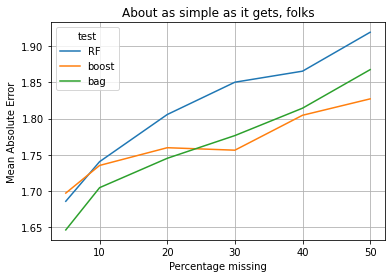

In [742]:
import matplotlib.pyplot as plt

# Data for plotting
t = np.array([5,10,20,30,40,50])
s1 = dbp_5_fold_random_forest['MAE_mean']
s2 = dbp_5_fold_XGB['MAE_mean']
s3 = dbp_5_fold_BAG['MAE_mean']
# s4 = five_fold_RF_MAE_mean
# s5 = five_fold_XGB_MAE_mean
# s6 = five_fold_BAG_MAE_mean
fig, ax = plt.subplots()
classes = ['RF',"boost", "bag"]

ax.plot(t,s1)
ax.plot(t, s2)
ax.plot(t, s3)
# ax.plot(t, s4)
# ax.plot(t, s5)
# ax.plot(t, s6)
ax.set(xlabel='Percentage missing', ylabel='Mean Absolute Error',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.legend(title="test", labels=classes)
plt.show()

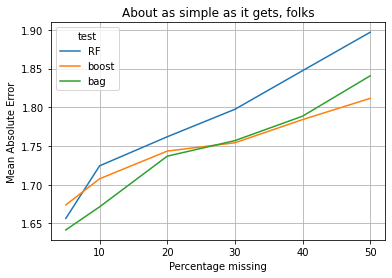

In [746]:
import matplotlib.pyplot as plt

# Data for plotting
t = np.array([5,10,20,30,40,50])
s1 = dbp_10_fold_random_forest['MAE_mean']
s2 = dbp_10_fold_XGB['MAE_mean']
s3 = dbp_10_fold_BAG['MAE_mean']
# s4 = five_fold_RF_MAE_mean
# s5 = five_fold_XGB_MAE_mean
# s6 = five_fold_BAG_MAE_mean
fig, ax = plt.subplots()
classes = ['RF',"boost", "bag"]

ax.plot(t,s1)
ax.plot(t, s2)
ax.plot(t, s3)
# ax.plot(t, s4)
# ax.plot(t, s5)
# ax.plot(t, s6)
ax.set(xlabel='Percentage missing', ylabel='Mean Absolute Error',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.legend(title="test", labels=classes)
plt.show()

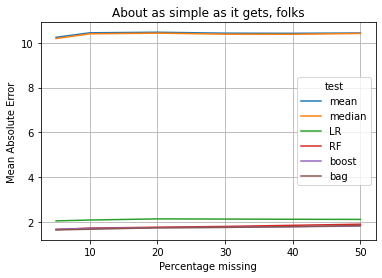

In [747]:
# Data for plotting
t = np.array([5,10,20,30,40,50])
s1 = dbp_10_fold_mean['MAE_mean']
s2 = dbp_10_fold_median['MAE_mean']
s3 = dbp_10_fold_linear['MAE_mean']
s4 = dbp_10_fold_random_forest['MAE_mean']
s5 = dbp_10_fold_XGB['MAE_mean']
s6 = dbp_10_fold_BAG['MAE_mean']
# s4 = five_fold_RF_MAE_mean
# s5 = five_fold_XGB_MAE_mean
# s6 = five_fold_BAG_MAE_mean
fig, ax = plt.subplots()
classes = ['mean','median','LR','RF',"boost", "bag"]

ax.plot(t,s1)
ax.plot(t, s2)
ax.plot(t, s3)
ax.plot(t, s4)
ax.plot(t, s5)
ax.plot(t, s6)
ax.set(xlabel='Percentage missing', ylabel='Mean Absolute Error',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.legend(title="test", labels=classes)
plt.show()

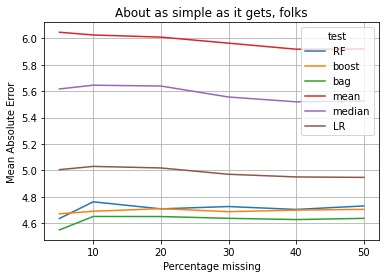

In [748]:
# Data for plotting
t = np.array([5,10,20,30,40,50])
s1 = resp_10_fold_mean['MAE_mean']
s2 = resp_10_fold_median['MAE_mean']
s3 = resp_10_fold_linear['MAE_mean']
s4 = resp_10_fold_random_forest['MAE_mean']
s5 = resp_10_fold_XGB['MAE_mean']
s6 = resp_10_fold_BAG['MAE_mean']
# s4 = five_fold_RF_MAE_mean
# s5 = five_fold_XGB_MAE_mean
# s6 = five_fold_BAG_MAE_mean
fig, ax = plt.subplots()
classes = ['RF',"boost", "bag", 'mean','median','LR']


ax.plot(t, s4)
ax.plot(t, s5)
ax.plot(t, s6)
ax.plot(t,s1)
ax.plot(t, s2)
ax.plot(t, s3)
ax.set(xlabel='Percentage missing', ylabel='Mean Absolute Error',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.legend(title="test", labels=classes)
plt.show()

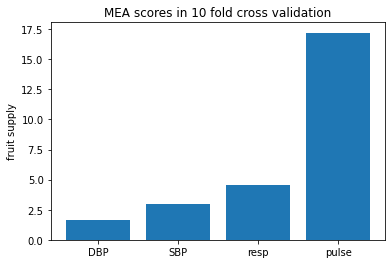

In [736]:
fig, ax = plt.subplots()

fruits = ['DBP', 'SBP', 'resp', 'pulse']
counts = [1.64, 3.0, 4.58, 17.2]
bar_labels = ['red', 'blue', 'green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts)#, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('MEA scores in 10 fold cross validation')
# ax.legend(title='Fruit color')

plt.show()

In [490]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# def mice(estimator, dataframe, target):
#     mice = IterativeImputer(estimator=estimator)

#     # copy the df because we want to delete the target column before prediction
#     dbp_copy = dataframe.copy()
# #     print(dbp_copy[target])
#     abc = dbp_copy.drop(target, axis=1)
#     mice.fit(abc)
#     # filling in values in the original df
#     a = mice.transform(abc)
#     # a[:,45] is the imputed values and dpb_final is the orignal from which we amputed
#     MAE = metrics.mean_absolute_error(dbp_copy[target], a[:,45])
#     MSE = metrics.mean_squared_error(dbp_copy[target], a[:,45])
#     print("MAE", MAE)
#     print("MSE", MSE)

In [578]:
# def lin(dataframe, target):    
#     dbp_copy = dataframe.copy()
# #     print(dbp_copy[target])
#     final_data = dbp_copy.drop(target, axis=1)    
#     X = final_data.iloc[:, np.r_[0:45]].values
#     y = final_data.iloc[:, 45].values 
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
#     final_data.isnull().sum()
#     final_data.isnull().values.any()
#     regressor = LinearRegression()
#     regressor.fit(X_train, y_train)
#     y_pred = regressor.predict(X_test)
#     a=metrics.mean_absolute_error(y_test, y_pred)

In [580]:
# lin(dbp_50, 'dbp_final')

In [511]:
# mice(LinearRegression(), dbp_50, 'dbp_final')

[ 84.  78.  99. ... 118. 130. 118.]
MAE 1.0677216858798884
MSE 6.056235550561596


MAE 0.2130921884525271
MSE 1.139612730025547


[129.48384089 124.94384511 143.84519106 ... 170.         173.37101583
 160.37386189]
MAE 2.0634194782351583
MSE 22.844769424789586


[133. 129. 143. ... 170. 179. 167.]
MAE 0.4136441894713336
MSE 5.139506537551086


MAE 1.9764866986112577
MSE 80.9655870831895


MAE 0.49576724085107104
MSE 4.019062504116337


MAE 2.461743763348654
MSE 20.160565015370917


In [425]:
#mice(RandomForestRegressor())

In [505]:
# dbp_50

,age_at_surg_checkin,peripheral_pulse_rate,Respiratory_Rate_br_per_min,SpO2,map_rec_final,sbp_final,dbp_final,map_cal_final,sbp_final_min,dbp_final_min,...,disch_disp_desc_src_7,disch_disp_desc_src_8,disch_disp_desc_src_9,disch_disp_desc_src_10,disch_disp_desc_src_11,is_surg_case_major,surg_start_to_stop_elapsed_time_minutes,diff_in_seconds,max_pulse_variation,dbp_ampute
0,70,92,25.0,91,80,133,60,84,117,53,...,0,0,0,0,0,1,114,27678960,92,NaN
1,70,78,16.0,93,76,129,53,78,117,53,...,0,0,0,0,0,1,114,27678960,92,53.0
2,70,78,23.0,0,89,143,77,99,117,53,...,0,0,0,0,0,1,114,27678960,92,77.0
3,70,86,18.0,93,97,146,78,101,117,53,...,0,0,0,0,0,1,114,27678960,92,78.0
4,70,71,28.0,92,93,144,73,97,117,53,...,0,0,0,0,0,1,114,27678960,92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,73,94,0.0,0,127,181,100,127,86,55,...,0,0,0,0,0,1,142,47163360,106,NaN
27746,73,86,0.0,0,121,172,96,121,86,55,...,0,0,0,0,0,1,142,47163360,106,96.0
27747,73,0,0.0,0,118,170,92,118,86,55,...,0,0,0,0,0,1,142,47163360,106,92.0
27748,73,87,0.0,96,130,179,105,130,86,55,...,0,0,0,0,0,1,142,47163360,106,NaN


Step 1: A simple imputation, such as imputing the mean, is performed for every missing value in the dataset. These mean imputations can be thought of as “place holders.”

Step 2: The “place holder” mean imputations for one variable (“var”) are set back to missing.

Step 3: The observed values from the variable “var” in Step 2 are regressed on the other variables in the imputation model, which may or may not consist of all of the variables in the dataset. In other words, “var” is the dependent variable in a regression model and all the other variables are independent variables in the regression model. These regression models operate under the same assumptions that one would make when performing linear, logistic, or Poison regression models outside of the context of imputing missing data.

Step 4: The missing values for “var” are then replaced with predictions (imputations) from the regression model. When “var” is subsequently used as an independent variable in the regression models for other variables, both the observed and these imputed values will be used.

Step 5: Steps 2–4 are then repeated for each variable that has missing data. The cycling through each of the variables constitutes one iteration or “cycle.” At the end of one cycle all of the missing values have been replaced with predictions from regressions that reflect the relationships observed in the data.

Step 6: Steps 2–4 are repeated for a number of cycles, with the imputations being updated at each cycle.

#Explanation with Example

Step 1: Replace (or impute) the missing values in each variable with temporary "place holder" values derived solely from the non-missing values available for that variable. For example, replace the missing age value with the mean age value observed in the data, replace the missing income values with the mean income value observed in the data, etc.

Step 2 Set back to missing the “place holder” imputations for the age variable only. This way, the current data copy contains missing values for age, but not for income and gender.

Step 3: Regress age on income and gender via a linear regression model (though it is possible to also regress age on only one of these variables); to be able to fit the model to the current data copy, drop all the records where age is missing during the model fitting process. In this model, age is the dependent variable and income and gender are the independent variables.

Step 4 Use the fitted regression model in the previous step to predict the missing age values. (When age will be subsequently used as an independent variable in the regression models for other variables, both the observed values of age and these predicted values will be used.) The article doesn't make it clear that a random component should be added to these predictions.

Step 5: Repeat Steps 2–4 separately for each variable that has missing data, namely income and gender.



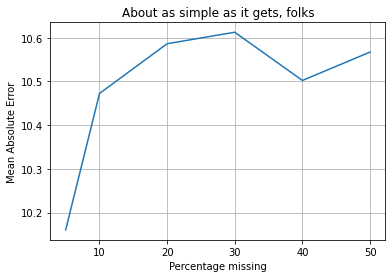